# Predict German Election - Model Testing

In [2]:
#import libraries

import pyreadr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [3]:
#load data

polls = pd.read_csv("polls_btw.csv", index_col='date', parse_dates=True)
polls.head()

,election,sample_size,institute,party,support,election_date,days_to_election
date,,,,,,,
1951-04-15,1953.0,NaN,allensbach,oth,24.0,1953-09-06,875.0
1950-11-15,1953.0,NaN,allensbach,gru,NaN,1953-09-06,1026.0
1952-12-15,1953.0,NaN,allensbach,spd,35.0,1953-09-06,265.0
1953-02-15,1953.0,NaN,allensbach,spd,33.0,1953-09-06,203.0
1951-03-15,1953.0,NaN,allensbach,gru,NaN,1953-09-06,906.0


## Exploratory Data Analysis

In [4]:
#Impute sample_size with 1000 for missing values

polls["sample_size"].fillna(1000, inplace=True)
polls.head()

,election,sample_size,institute,party,support,election_date,days_to_election
date,,,,,,,
1951-04-15,1953.0,1000.0,allensbach,oth,24.0,1953-09-06,875.0
1950-11-15,1953.0,1000.0,allensbach,gru,NaN,1953-09-06,1026.0
1952-12-15,1953.0,1000.0,allensbach,spd,35.0,1953-09-06,265.0
1953-02-15,1953.0,1000.0,allensbach,spd,33.0,1953-09-06,203.0
1951-03-15,1953.0,1000.0,allensbach,gru,NaN,1953-09-06,906.0


In [5]:
#see how many unique polling institutions there are

polls['institute'].unique()

array(['allensbach', 'fgruppe_wahlen', 'forsa', 'emnid',
       'infratest_dimap', 'gms', 'insa'], dtype=object)

In [6]:
#see how many unique parties there are in the polls

polls['party'].unique()

array(['oth', 'gru', 'spd', 'cdu', 'lin', 'fdp', 'afd'], dtype=object)

In [7]:
#create data frame with polls from each institutions in 2017 

election2017_allen = polls.loc[(polls['institute'] == 'allensbach') & (polls['election'] == 2017)]
election2017_insa = polls.loc[(polls['institute'] == 'insa') & (polls['election'] == 2017)]
election2017_forsa = polls.loc[(polls['institute'] == 'forsa') & (polls['election'] == 2017)]
election2017_emnid = polls.loc[(polls['institute'] == 'emnid') & (polls['election'] == 2017)]
election2017_gms = polls.loc[(polls['institute'] == 'gms') & (polls['election'] == 2017)]
election2017_infra = polls.loc[(polls['institute'] == 'infratest_dimap') & (polls['election'] == 2017)]
election2017_fgruppe = polls.loc[(polls['institute'] == 'fgruppe_wahlen') & (polls['election'] == 2017)]

In [8]:
#check out institution allensbach: 

election2017_allen.head()

,election,sample_size,institute,party,support,election_date,days_to_election
date,,,,,,,
2015-06-18,2017.0,1400.0,allensbach,spd,26.0,2017-09-24,829.0
2016-08-24,2017.0,1496.0,allensbach,spd,23.0,2017-09-24,396.0
2015-08-19,2017.0,1400.0,allensbach,spd,26.0,2017-09-24,767.0
2015-02-19,2017.0,1400.0,allensbach,spd,25.5,2017-09-24,948.0
2017-07-18,2017.0,1403.0,allensbach,spd,25.0,2017-09-24,68.0


In [9]:
type(election2017_allen)

pandas.core.frame.DataFrame

In [10]:
#create allensbach's polls for AFD in 2017 election:

election2017_allen_afd = election2017_allen.loc[election2017_allen['party'] == 'afd']
#plot_allen_afd = sns.lineplot(x="days_to_election", y="support", data=election2017allen_afd)

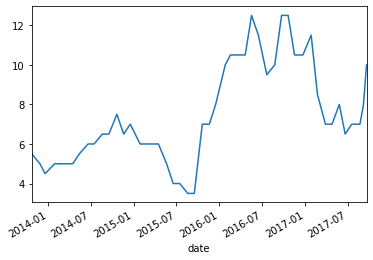

<Figure size 432x288 with 0 Axes>

In [11]:
#plot allensbach's polls for AFD in 2017 election:
#election2017allen_afd['date'] = election2017allen_afd.index
#melted_df = pd.melt(election2017allen_afd, id_vars='date', value_name='support')
#plot_allen_afd = sns.tsplot(melted_df, time='date', value='support')
election2017_allen_afd.support['2013-10-23':'2017-09-19'].plot()
plt.show()
plt.clf()

In [12]:
#resample the data by date 

upsampled_election2017_allen_afd = election2017_allen_afd['support'].resample('D').first()

In [13]:
#interpolate the data with linear method

interpolated_election2017_allen_afd = upsampled_election2017_allen_afd.interpolate(how='linear')
interpolated_election2017_allen_afd.head()

date
2013-10-23    5.500000
2013-10-24    5.485714
2013-10-25    5.471429
2013-10-26    5.457143
2013-10-27    5.442857
Freq: D, Name: support, dtype: float64

In [14]:
type(interpolated_election2017_allen_afd)

pandas.core.series.Series

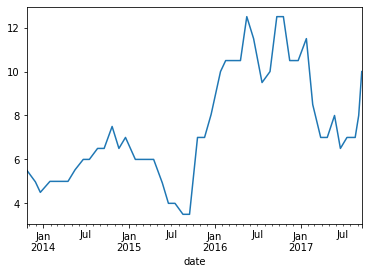

<Figure size 432x288 with 0 Axes>

In [16]:
interpolated_election2017_allen_afd.plot()
plt.show()
plt.clf()

## Data transformation of time-series 



#### AFD

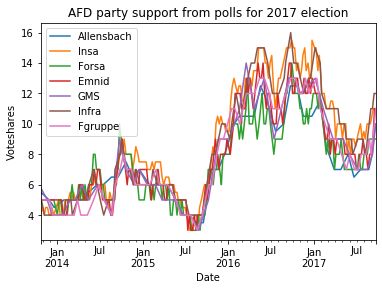

<Figure size 432x288 with 0 Axes>

In [17]:
#Create dataframe for AFD voteshares polls by each of the 7 institutions

election2017_allen_afd = election2017_allen.loc[election2017_allen['party'] == 'afd']
election2017_insa_afd = election2017_insa.loc[election2017_insa['party'] == 'afd']
election2017_forsa_afd = election2017_forsa.loc[election2017_forsa['party'] == 'afd']
election2017_emnid_afd = election2017_emnid.loc[election2017_emnid['party'] == 'afd']
election2017_gms_afd = election2017_gms.loc[election2017_gms['party'] == 'afd']
election2017_infra_afd = election2017_infra.loc[election2017_infra['party'] == 'afd']
election2017_fgruppe_afd = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'afd']

#Create upsampled and interpolated data for Allen in AFD voteshares

t_index_final = pd.date_range(start='2013-10-23', end='2017-09-21', freq='D')
t_index_allen = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_allen_afd = election2017_allen_afd['support'].resample('D').first().reindex(t_index_allen)
interpolated_election2017_allen_afd = upsampled_election2017_allen_afd.interpolate(how='linear')
interpolated_election2017_allen_afd = interpolated_election2017_allen_afd.reindex(t_index_final)

#Create upsampled and interpolated data for Insa in AFD voteshares

t_index_insa = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_insa_afd = election2017_insa_afd['support'].resample('D').first().reindex(t_index_insa)
interpolated_election2017_insa_afd = upsampled_election2017_insa_afd.interpolate(how='linear')
interpolated_election2017_insa_afd = interpolated_election2017_insa_afd.reindex(t_index_final)

#Create upsampled and interpolated data for Forsa in AFD voteshares

t_index_forsa = pd.date_range(start='2013-10-01', end='2017-09-21', freq='D')

upsampled_election2017_forsa_afd = election2017_forsa_afd['support'].resample('D').first().reindex(t_index_forsa)
interpolated_election2017_forsa_afd = upsampled_election2017_forsa_afd.interpolate(how='linear')
interpolated_election2017_forsa_afd = interpolated_election2017_forsa_afd.reindex(t_index_final)
interpolated_election2017_forsa_afd.tail()

#Create upsampled and interpolated data for Emnid in AFD voteshares

t_index_emnid = pd.date_range(start='2013-09-29', end='2017-09-21', freq='D')

upsampled_election2017_emnid_afd = election2017_emnid_afd['support'].resample('D').first().reindex(t_index_emnid)
interpolated_election2017_emnid_afd = upsampled_election2017_emnid_afd.interpolate(how='linear')
interpolated_election2017_emnid_afd = interpolated_election2017_emnid_afd.reindex(t_index_final)
interpolated_election2017_emnid_afd.tail()

#Create upsampled and interpolated data for GMS in AFD voteshares

t_index_gms = pd.date_range(start='2013-10-15', end='2017-09-21', freq='D')

upsampled_election2017_gms_afd = election2017_gms_afd['support'].resample('D').first().reindex(t_index_gms)
interpolated_election2017_gms_afd = upsampled_election2017_gms_afd.interpolate(how='linear')
interpolated_election2017_gms_afd = interpolated_election2017_gms_afd.reindex(t_index_final)
interpolated_election2017_gms_afd.tail()

#Create upsampled and interpolated data for Infra in AFD voteshares

t_index_infra = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_infra_afd = election2017_infra_afd['support'].resample('D').first().reindex(t_index_infra)
interpolated_election2017_infra_afd = upsampled_election2017_infra_afd.interpolate(how='linear')
interpolated_election2017_infra_afd = interpolated_election2017_infra_afd.reindex(t_index_final)
interpolated_election2017_gms_afd.tail()

#Create upsampled and interpolated data for Fgruppe in AFD voteshares

t_index_fgruppe = pd.date_range(start='2013-09-27', end='2017-09-21', freq='D')

upsampled_election2017_fgruppe_afd = election2017_fgruppe_afd['support'].resample('D').first().reindex(t_index_fgruppe)
interpolated_election2017_fgruppe_afd = upsampled_election2017_fgruppe_afd.interpolate(how='linear')
interpolated_election2017_fgruppe_afd = interpolated_election2017_fgruppe_afd.reindex(t_index_final)
interpolated_election2017_fgruppe_afd.tail()

# Plot out party support shares for AFD through polls of all institutions

interpolated_election2017_allen_afd.plot(label="Allensbach", legend = True)
interpolated_election2017_insa_afd.plot(label="Insa", legend = True)
interpolated_election2017_forsa_afd.plot(label="Forsa", legend = True)
interpolated_election2017_emnid_afd.plot(label="Emnid", legend = True)
interpolated_election2017_gms_afd.plot(label="GMS", legend = True)
interpolated_election2017_infra_afd.plot(label="Infra", legend = True)
interpolated_election2017_fgruppe_afd.plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("AFD party support from polls for 2017 election")
plt.show()
plt.clf()

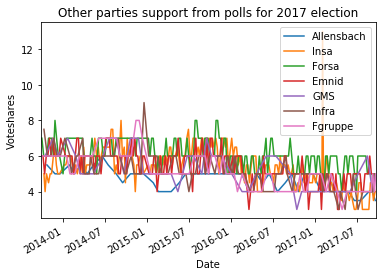

<Figure size 432x288 with 0 Axes>

In [18]:
# Plot party support for Other parties with different polling stations 

election2017_allen_oth = election2017_allen.loc[election2017_allen['party'] == 'oth']
election2017_insa_oth = election2017_insa.loc[election2017_insa['party'] == 'oth']
election2017_forsa_oth = election2017_forsa.loc[election2017_forsa['party'] == 'oth']
election2017_emnid_oth = election2017_emnid.loc[election2017_emnid['party'] == 'oth']
election2017_gms_oth = election2017_gms.loc[election2017_gms['party'] == 'oth']
election2017_infra_oth = election2017_infra.loc[election2017_infra['party'] == 'oth']
election2017_fgruppe_oth = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'oth']

election2017_allen_oth['support'].plot(label="Allensbach", legend = True)
election2017_insa_oth['support'].plot(label="Insa", legend = True)
election2017_forsa_oth['support'].plot(label="Forsa", legend = True)
election2017_emnid_oth['support'].plot(label="Emnid", legend = True)
election2017_gms_oth['support'].plot(label="GMS", legend = True)
election2017_infra_oth['support'].plot(label="Infra", legend = True)
election2017_fgruppe_oth['support'].plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("Other parties support from polls for 2017 election")
plt.show()
plt.clf()

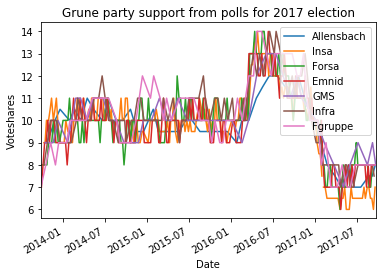

<Figure size 432x288 with 0 Axes>

In [19]:
election2017_allen_gru = election2017_allen.loc[election2017_allen['party'] == 'gru']
election2017_insa_gru = election2017_insa.loc[election2017_insa['party'] == 'gru']
election2017_forsa_gru = election2017_forsa.loc[election2017_forsa['party'] == 'gru']
election2017_emnid_gru = election2017_emnid.loc[election2017_emnid['party'] == 'gru']
election2017_gms_gru = election2017_gms.loc[election2017_gms['party'] == 'gru']
election2017_infra_gru = election2017_infra.loc[election2017_infra['party'] == 'gru']
election2017_fgruppe_gru = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'gru']

election2017_allen_gru['support'].plot(label="Allensbach", legend = True)
election2017_insa_gru['support'].plot(label="Insa", legend = True)
election2017_forsa_gru['support'].plot(label="Forsa", legend = True)
election2017_emnid_gru['support'].plot(label="Emnid", legend = True)
election2017_gms_gru['support'].plot(label="GMS", legend = True)
election2017_infra_gru['support'].plot(label="Infra", legend = True)
election2017_fgruppe_gru['support'].plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("Grune party support from polls for 2017 election")
plt.show()
plt.clf()

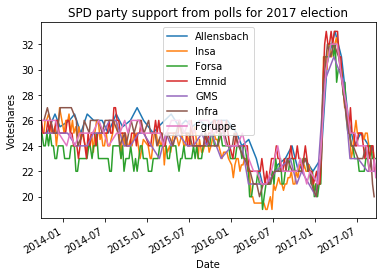

<Figure size 432x288 with 0 Axes>

In [20]:
election2017_allen_spd = election2017_allen.loc[election2017_allen['party'] == 'spd']
election2017_insa_spd = election2017_insa.loc[election2017_insa['party'] == 'spd']
election2017_forsa_spd = election2017_forsa.loc[election2017_forsa['party'] == 'spd']
election2017_emnid_spd = election2017_emnid.loc[election2017_emnid['party'] == 'spd']
election2017_gms_spd = election2017_gms.loc[election2017_gms['party'] == 'spd']
election2017_infra_spd = election2017_infra.loc[election2017_infra['party'] == 'spd']
election2017_fgruppe_spd = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'spd']

election2017_allen_spd['support'].plot(label="Allensbach", legend = True)
election2017_insa_spd['support'].plot(label="Insa", legend = True)
election2017_forsa_spd['support'].plot(label="Forsa", legend = True)
election2017_emnid_spd['support'].plot(label="Emnid", legend = True)
election2017_gms_spd['support'].plot(label="GMS", legend = True)
election2017_infra_spd['support'].plot(label="Infra", legend = True)
election2017_fgruppe_spd['support'].plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("SPD party support from polls for 2017 election")
plt.show()
plt.clf()

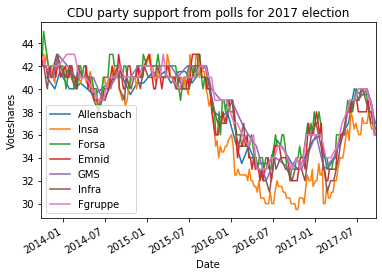

<Figure size 432x288 with 0 Axes>

In [21]:
election2017_allen_cdu = election2017_allen.loc[election2017_allen['party'] == 'cdu']
election2017_insa_cdu = election2017_insa.loc[election2017_insa['party'] == 'cdu']
election2017_forsa_cdu = election2017_forsa.loc[election2017_forsa['party'] == 'cdu']
election2017_emnid_cdu = election2017_emnid.loc[election2017_emnid['party'] == 'cdu']
election2017_gms_cdu = election2017_gms.loc[election2017_gms['party'] == 'cdu']
election2017_infra_cdu = election2017_infra.loc[election2017_infra['party'] == 'cdu']
election2017_fgruppe_cdu = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'cdu']

election2017_allen_cdu['support'].plot(label="Allensbach", legend = True)
election2017_insa_cdu['support'].plot(label="Insa", legend = True)
election2017_forsa_cdu['support'].plot(label="Forsa", legend = True)
election2017_emnid_cdu['support'].plot(label="Emnid", legend = True)
election2017_gms_cdu['support'].plot(label="GMS", legend = True)
election2017_infra_cdu['support'].plot(label="Infra", legend = True)
election2017_fgruppe_cdu['support'].plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("CDU party support from polls for 2017 election")
plt.show()
plt.clf()

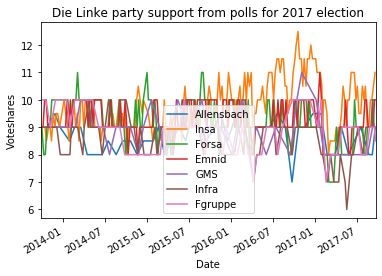

<Figure size 432x288 with 0 Axes>

In [22]:
election2017_allen_lin = election2017_allen.loc[election2017_allen['party'] == 'lin']
election2017_insa_lin = election2017_insa.loc[election2017_insa['party'] == 'lin']
election2017_forsa_lin = election2017_forsa.loc[election2017_forsa['party'] == 'lin']
election2017_emnid_lin = election2017_emnid.loc[election2017_emnid['party'] == 'lin']
election2017_gms_lin = election2017_gms.loc[election2017_gms['party'] == 'lin']
election2017_infra_lin = election2017_infra.loc[election2017_infra['party'] == 'lin']
election2017_fgruppe_lin = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'lin']

election2017_allen_lin['support'].plot(label="Allensbach", legend = True)
election2017_insa_lin['support'].plot(label="Insa", legend = True)
election2017_forsa_lin['support'].plot(label="Forsa", legend = True)
election2017_emnid_lin['support'].plot(label="Emnid", legend = True)
election2017_gms_lin['support'].plot(label="GMS", legend = True)
election2017_infra_lin['support'].plot(label="Infra", legend = True)
election2017_fgruppe_lin['support'].plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("Die Linke party support from polls for 2017 election")
plt.show()
plt.clf()

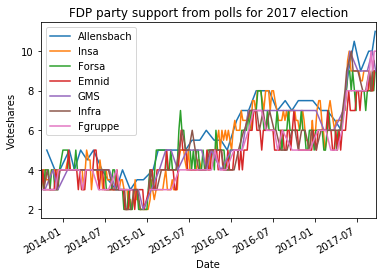

<Figure size 432x288 with 0 Axes>

In [23]:
election2017_allen_fdp = election2017_allen.loc[election2017_allen['party'] == 'fdp']
election2017_insa_fdp = election2017_insa.loc[election2017_insa['party'] == 'fdp']
election2017_forsa_fdp = election2017_forsa.loc[election2017_forsa['party'] == 'fdp']
election2017_emnid_fdp = election2017_emnid.loc[election2017_emnid['party'] == 'fdp']
election2017_gms_fdp = election2017_gms.loc[election2017_gms['party'] == 'fdp']
election2017_infra_fdp = election2017_infra.loc[election2017_infra['party'] == 'fdp']
election2017_fgruppe_fdp = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'fdp']

election2017_allen_fdp['support'].plot(label="Allensbach", legend = True)
election2017_insa_fdp['support'].plot(label="Insa", legend = True)
election2017_forsa_fdp['support'].plot(label="Forsa", legend = True)
election2017_emnid_fdp['support'].plot(label="Emnid", legend = True)
election2017_gms_fdp['support'].plot(label="GMS", legend = True)
election2017_infra_fdp['support'].plot(label="Infra", legend = True)
election2017_fgruppe_fdp['support'].plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("FDP party support from polls for 2017 election")
plt.show()
plt.clf()

In [24]:
#Create new dataframe with all new time-series from 7 institutions

frames_afd = [interpolated_election2017_allen_afd, interpolated_election2017_insa_afd, 
         interpolated_election2017_forsa_afd, interpolated_election2017_emnid_afd,
         interpolated_election2017_gms_afd, interpolated_election2017_infra_afd, 
         interpolated_election2017_fgruppe_afd]

result_afd = pd.concat(frames_afd, axis=1)
final_result_afd = result_afd.T
final_result_afd.head()

,2013-10-23 00:00:00,2013-10-24 00:00:00,2013-10-25 00:00:00,2013-10-26 00:00:00,2013-10-27 00:00:00,2013-10-28 00:00:00,2013-10-29 00:00:00,2013-10-30 00:00:00,2013-10-31 00:00:00,2013-11-01 00:00:00,...,2017-09-12 00:00:00,2017-09-13 00:00:00,2017-09-14 00:00:00,2017-09-15 00:00:00,2017-09-16 00:00:00,2017-09-17 00:00:00,2017-09-18 00:00:00,2017-09-19 00:00:00,2017-09-20 00:00:00,2017-09-21 00:00:00
support,5.500000,5.485714,5.471429,5.457143,5.442857,5.428571,5.414286,5.400000,5.385714,5.371429,...,8.923077,9.076923,9.230769,9.384615,9.538462,9.692308,9.846154,10.000000,10.000000,10.0
support,4.111111,4.166667,4.222222,4.277778,4.333333,4.388889,4.444444,4.500000,4.428571,4.357143,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0
support,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0
support,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,9.857143,10.142857,10.428571,10.714286,11.000000,11.000000,11.000000,11.000000,11.000000,11.0
support,5.771429,5.742857,5.714286,5.685714,5.657143,5.628571,5.600000,5.571429,5.542857,5.514286,...,8.714286,8.857143,9.000000,9.142857,9.285714,9.428571,9.571429,9.714286,9.857143,10.0


## MODELLING FOR AFD

In [25]:
#import libraries 

import talib
import numpy as np
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor


##### Correlations
Correlations are nice to check out before building machine learning models, because we can see which features correlate to the target most strongly. Pearson's correlation coefficient is often used, which only detects linear relationships. It's commonly assumed our data is normally distributed, which we can "eyeball" from histograms. Highly correlated variables have a Pearson correlation coefficient near 1 (positively correlated) or -1 (negatively correlated). A value near 0 means the two variables are not linearly correlated.

If we use the same time periods for previous voteshares changes and future voteshares changes, we can see if the vote share is mean-reverting (bounces around) or trend-following (goes up if it has been going up recently).

In [26]:
#Create dataframe from interpolated allensbach data for AFD

df_2017_allen_afd = interpolated_election2017_allen_afd.to_frame()
df_2017_allen_afd.tail()

,support
2017-09-17,9.692308
2017-09-18,9.846154
2017-09-19,10.000000
2017-09-20,10.000000
2017-09-21,10.000000


In [27]:
# Create 3-day % changes of support for the current day, and 3 days in the future

df_2017_allen_afd['3d_future'] = df_2017_allen_afd['support'].shift(-3)
df_2017_allen_afd['3d_future_pct'] = df_2017_allen_afd['3d_future'].pct_change(3)
df_2017_allen_afd['3d_pct'] = df_2017_allen_afd['support'].pct_change(3)

In [28]:
#look at the new dataframe

df_2017_allen_afd.head(10)

,support,3d_future,3d_future_pct,3d_pct
2013-10-23,5.500000,5.457143,NaN,NaN
2013-10-24,5.485714,5.442857,NaN,NaN
2013-10-25,5.471429,5.428571,NaN,NaN
2013-10-26,5.457143,5.414286,-0.007853,-0.007792
2013-10-27,5.442857,5.400000,-0.007874,-0.007812
2013-10-28,5.428571,5.385714,-0.007895,-0.007833
2013-10-29,5.414286,5.371429,-0.007916,-0.007853
2013-10-30,5.400000,5.357143,-0.007937,-0.007874
2013-10-31,5.385714,5.342857,-0.007958,-0.007895
2013-11-01,5.371429,5.328571,-0.007979,-0.007916


In [29]:
# Calculate the correlation matrix between the 3d close pecentage changes (current and future)

corr = df_2017_allen_afd[['3d_pct', '3d_future_pct']].corr()
print(corr)

                 3d_pct  3d_future_pct
3d_pct         1.000000       0.923151
3d_future_pct  0.923151       1.000000


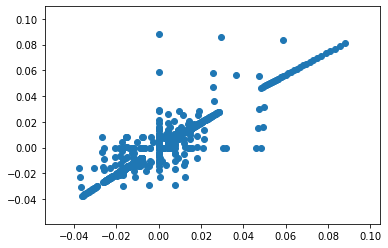

In [30]:
# Scatter the current 3-day percent change vs the future 3-day percent change
plt.scatter(df_2017_allen_afd['3d_pct'], df_2017_allen_afd['3d_future_pct'])
plt.show()

#### Create moving average

We want to add historical data to our machine learning models to make better predictions, but adding lots of historical time steps is tricky. Instead, we can condense information from previous points into a single timestep with indicators.

A moving average is one of the simplest indicators - it's the average of previous data points. This is the function talib.SMA() from the TAlib library.

In [31]:
feature_names = ['3d_future_pct']  # a list of the feature names for later

# Create moving averages timeperiods of 3, 5, 10, 20, 30, 50, 100 and 200
for n in [3, 5, 10, 20, 30, 50, 100, 200]:

    # Create the moving average indicator and divide by support
    df_2017_allen_afd['ma' + str(n)] = talib.SMA(df_2017_allen_afd['support'].values,
                              timeperiod=n) / df_2017_allen_afd['support']
    # Create the RSI indicator
    #df_2017_allen_afd['rsi' + str(n)] = talib.RSI(df_2017_allen_afd['support'].values, timeperiod=n)
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n)]
print(feature_names)


['3d_future_pct', 'ma3', 'ma5', 'ma10', 'ma20', 'ma30', 'ma50', 'ma100', 'ma200']


In [32]:
df_2017_allen_afd.head(20)

,support,3d_future,3d_future_pct,3d_pct,ma3,ma5,ma10,ma20,ma30,ma50,ma100,ma200
2013-10-23,5.500000,5.457143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-24,5.485714,5.442857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-25,5.471429,5.428571,NaN,NaN,1.002611,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-26,5.457143,5.414286,-0.007853,-0.007792,1.002618,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-27,5.442857,5.400000,-0.007874,-0.007812,1.002625,1.005249,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-28,5.428571,5.385714,-0.007895,-0.007833,1.002632,1.005263,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-29,5.414286,5.371429,-0.007916,-0.007853,1.002639,1.005277,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-30,5.400000,5.357143,-0.007937,-0.007874,1.002646,1.005291,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-31,5.385714,5.342857,-0.007958,-0.007895,1.002653,1.005305,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-01,5.371429,5.328571,-0.007979,-0.007916,1.002660,1.005319,1.011968,NaN,NaN,NaN,NaN,NaN


In [40]:
df_2017_allen_afd = df_2017_allen_afd.dropna()

# Create features and targets
# use feature_names for features; '5d_close_future_pct' for targets
features = df_2017_allen_afd[feature_names]
targets = df_2017_allen_afd['3d_future']

# Create DataFrame from target column and feature columns
feature_and_target_cols = ['3d_future'] + feature_names
feat_targ_df = df_2017_allen_afd[feature_and_target_cols]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

               3d_future  3d_future_pct       ma3       ma5      ma10  \
3d_future       1.000000       0.010718 -0.046979 -0.056604 -0.079524   
3d_future_pct   0.010718       1.000000 -0.942369 -0.930175 -0.896611   
ma3            -0.046979      -0.942369  1.000000  0.994403  0.967001   
ma5            -0.056604      -0.930175  0.994403  1.000000  0.984826   
ma10           -0.079524      -0.896611  0.967001  0.984826  1.000000   
ma20           -0.121077      -0.827028  0.902962  0.927801  0.970825   
ma30           -0.157662      -0.752974  0.833167  0.860684  0.915457   
ma50           -0.218267      -0.624141  0.701935  0.729511  0.790111   
ma100          -0.326635      -0.449299  0.513022  0.535717  0.587977   
ma200          -0.482655      -0.313555  0.369658  0.388982  0.434164   

                   ma20      ma30      ma50     ma100     ma200  
3d_future     -0.121077 -0.157662 -0.218267 -0.326635 -0.482655  
3d_future_pct -0.827028 -0.752974 -0.624141 -0.449299 -0.313555 

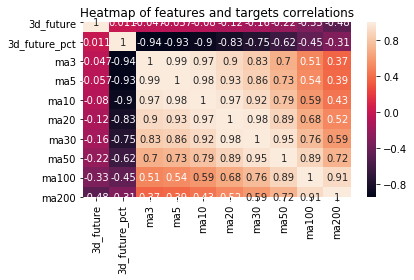

<Figure size 432x288 with 0 Axes>

In [41]:
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.title("Heatmap of features and targets correlations")
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()  # clear the plot area

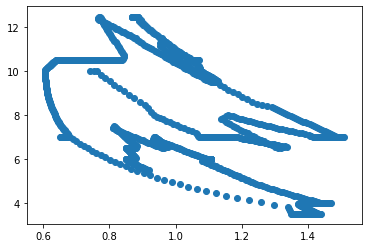

In [42]:
# Create a scatter plot of the most highly correlated variable with the target
plt.scatter(df_2017_allen_afd['ma200'], df_2017_allen_afd['3d_future'])
plt.show()

#### Linear Model 

##### Create training and test features

In [43]:

# Import the statsmodels.api library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.85 * features.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]
print(linear_features.shape, train_features.shape, test_features.shape)

(1228, 10) (1043, 10) (185, 10)


In [44]:
# Create the linear model and complete the least squares fit
model_allen_afd = sm.OLS(train_targets, train_features)
results_allen_afd = model_allen_afd.fit()  # fit the model
print(results_allen_afd.summary())

                            OLS Regression Results                            
Dep. Variable:              3d_future   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     65.71
Date:                Mon, 04 Nov 2019   Prob (F-statistic):           2.32e-95
Time:                        11:06:11   Log-Likelihood:                -2246.0
No. Observations:                1043   AIC:                             4512.
Df Residuals:                    1033   BIC:                             4561.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            27.5580     78.431      0.351

In [45]:
# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results_allen_afd.pvalues)


const            7.253838e-01
3d_future_pct    1.045518e-01
ma3              9.352551e-01
ma5              9.266700e-01
ma10             6.987048e-01
ma20             4.139108e-01
ma30             2.744931e-01
ma50             3.251931e-02
ma100            3.659072e-17
ma200            6.243565e-65
dtype: float64


In [46]:
# Make predictions from our model for train and test sets
train_predictions = results_allen_afd.predict(train_features)
test_predictions = results_allen_afd.predict(test_features)

#### Evaluate Linear Model Results

Once we have our linear fit and predictions, we want to see how good the predictions are so we can decide if our model is any good or not. 

A quick way to understand the performance of our model is looking at regression evaluation metrics like R2, and plotting the predictions versus the actual values of the targets. Perfect predictions would form a straight, diagonal line in such a plot, making it easy for us to eyeball how our predictions are doing in different regions of voteshare changes.

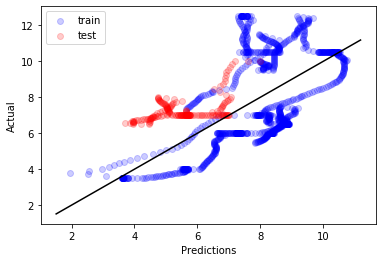

In [47]:
# Scatter the predictions vs the targets with 80% transparency
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha = 0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.title('')
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.legend()  # show the legend
plt.show()

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

linear_model_allen_afd = LinearRegression()
linear_model_allen_afd.fit(train_features, train_targets)

# Check the score on train and test
print(linear_model_allen_afd.score(train_features, train_targets))
print(linear_model_allen_afd.score(test_features, test_targets))

#Check Root mean squared error
linear_model_allen_afd_pred = linear_model_allen_afd.predict(test_features)
print(sqrt(mean_squared_error(linear_model_allen_afd_pred, test_targets)))

0.36407560540611095
-7.226329182383553
1.9504572826298539


#### Decision Tree Model

In [49]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_allen_afd = DecisionTreeRegressor(max_depth=3)

# Fit the model to the training features and targets
decision_tree_allen_afd.fit(train_features, train_targets)

# Check the score on train and test
print(decision_tree_allen_afd.score(train_features, train_targets))
print(decision_tree_allen_afd.score(test_features, test_targets))

#Check Root mean squared error
decision_tree_allen_afd_pred = decision_tree_allen_afd.predict(test_features)
print(sqrt(mean_squared_error(decision_tree_allen_afd_pred, test_targets)))

0.49153789399141035
-7.455099450630595
1.9773919473928245


As expected, perfect fit on the training data but quite a bad fit on the test data. Let's see if we can improve by experimenting on the max height of the trees. 

In [50]:
# Loop through a few different max depths and check the performance
for d in [3, 5, 10, 15, 20, 25]:
    # Create the tree and fit it
    decision_tree_allen_afd = DecisionTreeRegressor(max_depth=d)
    decision_tree_allen_afd.fit(train_features, train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree_allen_afd.score(train_features, train_targets))
    print(decision_tree_allen_afd.score(test_features, test_targets), '\n')

max_depth= 3
0.49153789399141035
-7.242002638189579 

max_depth= 5
0.74355218068711
-13.18511937028697 

max_depth= 10
0.9813466370440243
-14.582216821312299 

max_depth= 15
0.9999949868538771
-14.933799384162313 

max_depth= 20
1.0
-15.623999674534666 

max_depth= 25
1.0
-14.68726593219455 



It seems that trees of max height 3 would be the best at predicting the changes in voteshares percentage during the next 5 days. 

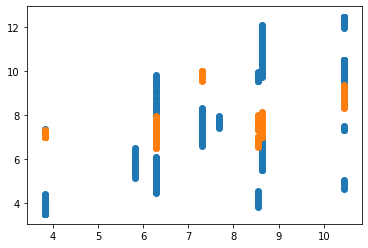

In [51]:
# Use the best max_depth of 3 from last exercise to fit a decision tree
decision_tree_allen_afd = DecisionTreeRegressor(max_depth=3)
decision_tree_allen_afd.fit(train_features, train_targets)

# Predict values for train and test
train_predictions = decision_tree_allen_afd.predict(train_features)
test_predictions = decision_tree_allen_afd.predict(test_features)

# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label = 'test')
plt.show()

#### Random Forest Model 

In [52]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr_allen_afd = RandomForestRegressor(n_estimators=50)
rfr_allen_afd.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr_allen_afd.score(train_features, train_targets))
print(rfr_allen_afd.score(test_features, test_targets))

# Check RMSE
rfr_allen_afd_pred = rfr_allen_afd.predict(test_features)
print(sqrt(mean_squared_error(rfr_allen_afd_pred, test_targets)))

0.9964921464497729
-9.191302729579164
2.1709421575921937


Let's see if we can improve on the score with hyperparameter tuning: 

In [53]:
from sklearn.model_selection import ParameterGrid

# Create a dictionary of hyperparameters to search
grid = {'n_estimators': [50,100,200,300], 'max_depth': [3], 'max_features': [4, 8], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr_allen_afd.set_params(**g)  # ** is "unpacking" the dictionary
    rfr_allen_afd.fit(train_features, train_targets)
    test_scores.append(rfr_allen_afd.score(test_features, test_targets))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

-3.8163508183839667 {'random_state': 42, 'n_estimators': 50, 'max_features': 4, 'max_depth': 3}


0.5274883159960239
-3.8163508183839667
1.4924248013938481


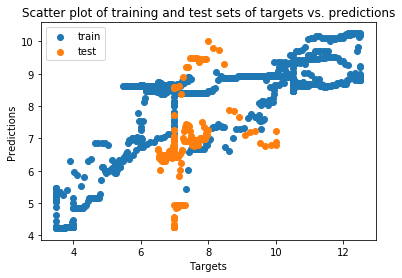

In [54]:
# Use the best hyperparameters from before to fit a random forest model
rfr_allen_afd = RandomForestRegressor(n_estimators=50, max_depth=3, max_features=4, random_state=42)
rfr_allen_afd.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = rfr_allen_afd.predict(train_features)
test_predictions = rfr_allen_afd.predict(test_features)

# Look at the R^2 scores on train and test
print(rfr_allen_afd.score(train_features, train_targets))
print(rfr_allen_afd.score(test_features, test_targets))

# Check RMSE
rfr_allen_afd_pred = rfr_allen_afd.predict(test_features)
print(sqrt(mean_squared_error(rfr_allen_afd_pred, test_targets)))

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
plt.title('Scatter plot of training and test sets of targets vs. predictions')
plt.xlabel('Targets')
plt.ylabel('Predictions')
plt.legend()
plt.show()

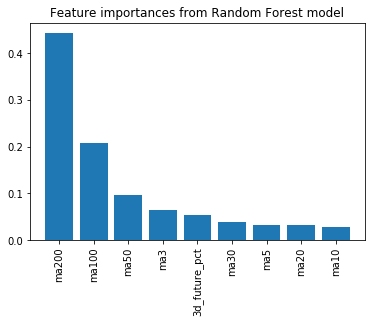

In [55]:
# Get feature importances from our random forest model
importances = rfr_allen_afd.feature_importances_
importances = importances[importances != 0]

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# Create tick labels 
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.title("Feature importances from Random Forest model")
plt.show()

In [56]:
# Gradient Boosting Model 
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model
gbr_allen_afd = GradientBoostingRegressor(max_features=4,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
result_gbr = gbr_allen_afd.fit(train_features, train_targets)

print(gbr_allen_afd.score(train_features, train_targets))
print(gbr_allen_afd.score(test_features, test_targets))

# Check RMSE
gbr_allen_afd_pred = gbr_allen_afd.predict(test_features)
print(sqrt(mean_squared_error(gbr_allen_afd_pred, test_targets)))

0.6491622974727742
-2.6842097576611614
1.3052856855710697


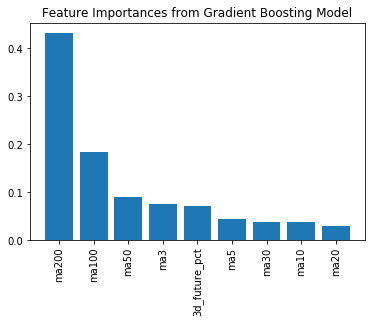

In [57]:
# Extract feature importances from the fitted gradient boosting model
feature_importances_gbr = gbr_allen_afd.feature_importances_
feature_importances_gbr = feature_importances_gbr[feature_importances_gbr != 0]

# Get the indices of the largest to smallest feature importances
sorted_index_gbr = np.argsort(feature_importances_gbr)[::-1]
x_gbr = range(features.shape[1])

# Create tick labels 
labels = np.array(feature_names)[sorted_index_gbr]

plt.bar(x_gbr, feature_importances_gbr[sorted_index_gbr], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.title('Feature Importances from Gradient Boosting Model')
plt.show()

In [58]:
# XGBoost Model
from xgboost import XGBRegressor
import xgboost as xgb

# Create the xgboost model and fit to the training data

xgb_model_allen_afd = XGBRegressor(colsample_bytree = 0.7, learning_rate= 0.01, max_depth= 7, min_child_weight= 4, n_estimators= 500, nthread= 4, objective= 'reg:linear', silent= 1, subsample= 0.7)
result_xgb = xgb_model_allen_afd.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(xgb_model_allen_afd.score(train_features, train_targets))
print(xgb_model_allen_afd.score(test_features, test_targets))

# Check RMSE
xgb_model_allen_afd_pred = xgb_model_allen_afd.predict(test_features)
print(sqrt(mean_squared_error(xgb_model_allen_afd_pred, test_targets)))

/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


0.9935721491089263
-6.338438362174
1.8421934190527058


In [59]:
from sklearn.model_selection import GridSearchCV

xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [0.01, 0.03, 0.05, 0.07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(train_features,
         train_targets)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  24 out of  24 | elapsed:   38.1s finished
/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


-11.920163700977515
{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [60]:
dtrain = xgb.DMatrix(train_features, label=train_targets)
dtest = xgb.DMatrix(test_features, label=test_targets)


In [61]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

params['eval_metric'] = "rmse"
num_boost_round = 999
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10)

[0]	Test-rmse:5.45681
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:4.45589
[2]	Test-rmse:3.48937
[3]	Test-rmse:2.90346
[4]	Test-rmse:2.49636
[5]	Test-rmse:2.28716
[6]	Test-rmse:2.14886
[7]	Test-rmse:2.03212
[8]	Test-rmse:2.02118
[9]	Test-rmse:1.9997
[10]	Test-rmse:1.97564
[11]	Test-rmse:1.9574
[12]	Test-rmse:1.95522
[13]	Test-rmse:1.95556
[14]	Test-rmse:1.94934
[15]	Test-rmse:1.95773
[16]	Test-rmse:1.96366
[17]	Test-rmse:1.96626
[18]	Test-rmse:1.9682
[19]	Test-rmse:1.96976
[20]	Test-rmse:1.97611
[21]	Test-rmse:1.98164
[22]	Test-rmse:1.98453
[23]	Test-rmse:1.98448
[24]	Test-rmse:1.98564
Stopping. Best iteration:
[14]	Test-rmse:1.94934



In [62]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'rmse'},
    early_stopping_rounds=10)
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,5.630099,0.058773,5.643082,0.224678
1,4.054260,0.043310,4.080913,0.189644
2,2.963434,0.030343,3.015410,0.169399
3,2.184361,0.023999,2.266692,0.146381
4,1.631810,0.021898,1.744600,0.136442
5,1.241045,0.026979,1.385241,0.105369
6,0.962718,0.033240,1.134914,0.108229
7,0.767438,0.034188,0.977461,0.096910
8,0.634805,0.034852,0.873447,0.084350
9,0.531472,0.045482,0.790444,0.078768


In [63]:
cv_results['test-rmse-mean'].min()

0.48311600000000005

In [64]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [65]:
# Define initial best params and RMSE
min_rmse = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best RMSE
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with max_depth=9, min_child_weight=5


/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


	MAE 0.4737476 for 206 rounds
CV with max_depth=9, min_child_weight=6
	MAE 0.47844 for 187 rounds
CV with max_depth=9, min_child_weight=7
	MAE 0.4741632 for 291 rounds
CV with max_depth=10, min_child_weight=5
	MAE 0.46714520000000004 for 212 rounds
CV with max_depth=10, min_child_weight=6
	MAE 0.46527799999999997 for 260 rounds
CV with max_depth=10, min_child_weight=7
	MAE 0.4567472 for 194 rounds
CV with max_depth=11, min_child_weight=5
	MAE 0.46822660000000005 for 122 rounds
CV with max_depth=11, min_child_weight=6
	MAE 0.4577922 for 148 rounds
CV with max_depth=11, min_child_weight=7
	MAE 0.46371219999999996 for 175 rounds
Best params: 10, 7, RMSE: 0.4567472


In [66]:
#Best parameters for XGBoost
params['max_depth'] = 10
params['min_child_weight'] = 7

In [67]:
# Retrain the xgboost model and fit to the training data

xgb_model_allen_afd_new = XGBRegressor(max_depth = 10, min_child_weight = 7)
result_xgb_new = xgb_model_allen_afd_new.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(xgb_model_allen_afd_new.score(train_features, train_targets))
print(xgb_model_allen_afd_new.score(test_features, test_targets))

# Check RMSE
xgb_model_allen_afd_pred_new = xgb_model_allen_afd_new.predict(test_features)
print(sqrt(mean_squared_error(xgb_model_allen_afd_pred_new, test_targets)))

0.9990442086663633
-12.253587432769663
2.475712017665856


In [68]:
test_predictions_xgb_model_allen_afd = xgb_model_allen_afd.predict(test_features)
print(test_predictions_xgb_model_allen_afd)

[ 5.0823555  4.8356266  4.780753   4.7063007  4.6972656  4.6795754
  4.6412897  4.643743   4.290041   4.22273    4.195858   3.9055285
  3.8365057  3.8257601  3.822423   3.9485664  4.0189815  3.9722369
  4.053282   4.0418873  4.0117707  3.9670687  3.901749   3.906745
  3.9137437  3.908189   3.906248   3.9071925  3.9111154  3.917679
  3.9139152  3.9141808  3.9153435  3.9259977  3.9212432  3.8185923
  4.778002   4.629844   4.6720014  5.612432   5.595858   5.5586443
  5.8365316  6.0894265  6.3105626  7.319275   7.560528   7.648975
  7.7768135  7.5335803  7.2293706  7.200326   7.1947885  7.214039
  7.2142286  7.06772    7.0176477  7.0048175  7.0196376  7.0857186
  7.1090193  7.102383   7.113862   7.1479936  7.1861653  7.1805534
  7.273359   5.906724   6.0848722  6.7295218  5.893462   6.237844
  6.3848677  6.236099   6.228487   6.32507    6.2809515  6.1802154
  6.1942964  6.1001034  6.4887342  6.331976   6.1870527  6.0202103
  6.0063214  6.365699   6.483148   6.5622845  6.609639   6.717566
 

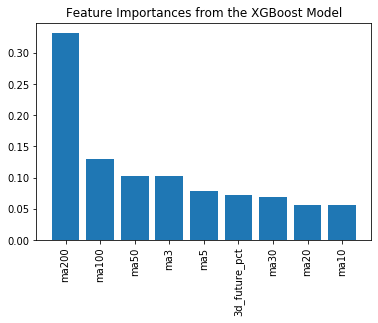

In [69]:
# Extract feature importances from the fitted gradient boosting model
feature_importances_xgb = xgb_model_allen_afd.feature_importances_
feature_importances_xgb = feature_importances_xgb[feature_importances_xgb != 0]

# Get the indices of the largest to smallest feature importances
sorted_index_xgb = np.argsort(feature_importances_xgb)[::-1]
x_xgb = range(features.shape[1])

# Create tick labels 
labels = np.array(feature_names)[sorted_index_xgb]

plt.bar(x_xgb, feature_importances_xgb[sorted_index_xgb], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.title('Feature Importances from the XGBoost Model')
plt.show()

In [70]:
# Deep Learning Model

#import libraries 
import tensorflow as tf
from tensorflow import keras

dnnmodel_allen_afd = tf.keras.Sequential()
dnnmodel_allen_afd.add(keras.layers.Dense(100, input_dim=train_features.shape[1], activation='relu'))
dnnmodel_allen_afd.add(keras.layers.Dense(20, activation='relu'))
dnnmodel_allen_afd.add(keras.layers.Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
dnnmodel_allen_afd.compile(optimizer='adam', loss='mean_squared_error')
history = dnnmodel_allen_afd.fit(train_features, train_targets, epochs=25)
print(dnnmodel_allen_afd.predict(test_features))

/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
W1104 11:07:54.941050 4661265856 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.
W1104 11:07:55.178345 4661265856 __init__.py:335] Limited tf.summary API due to missing TensorBoard installation.


Train on 1043 samples
Epoch 1/25
1043/1043 [==============================] - 0s 193us/sample - loss: 42.1595
Epoch 2/25
1043/1043 [==============================] - 0s 84us/sample - loss: 10.2817
Epoch 3/25
1043/1043 [==============================] - 0s 41us/sample - loss: 7.9175
Epoch 4/25
1043/1043 [==============================] - 0s 52us/sample - loss: 7.7542
Epoch 5/25
1043/1043 [==============================] - 0s 69us/sample - loss: 7.6588
Epoch 6/25
1043/1043 [==============================] - 0s 71us/sample - loss: 7.5846
Epoch 7/25
1043/1043 [==============================] - 0s 36us/sample - loss: 7.5481
Epoch 8/25
1043/1043 [==============================] - 0s 50us/sample - loss: 7.4108
Epoch 9/25
1043/1043 [==============================] - 0s 42us/sample - loss: 7.3253
Epoch 10/25
1043/1043 [==============================] - 0s 37us/sample - loss: 7.2387
Epoch 11/25
1043/1043 [==============================] - 0s 50us/sample - loss: 7.1718
Epoch 12/25
1043/1043 [====

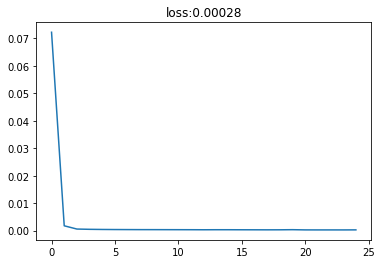

In [256]:
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

In [259]:
# Evaluate R^2 scores
from sklearn.metrics import mean_squared_error, r2_score

train_preds_dnn_allen_afd = dnnmodel_allen_afd.predict(train_features)
test_preds_dnn_allen_afd = dnnmodel_allen_afd.predict(test_features)
print(r2_score(train_targets, train_preds_dnn_allen_afd))
print(r2_score(test_targets, test_preds_dnn_allen_afd))

0.1084825883750129
-1.338070462160454


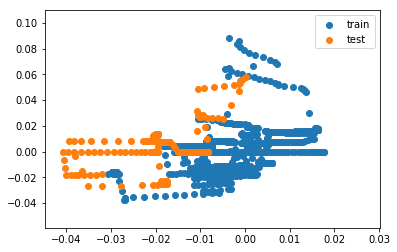

In [260]:
# Scatter the predictions vs actual
plt.scatter(train_preds_dnn_allen_afd, train_targets, label='train')
plt.scatter(test_preds_dnn_allen_afd, test_targets, label='test')  # plot test set
plt.legend(); plt.show()

#### Combined Average Model for AFD Party in 2017 Polls

In [71]:
# combine and take average of all 

df_2017_allen_afd_combined = interpolated_election2017_allen_afd.to_frame()
df_2017_insa_afd_combined = interpolated_election2017_insa_afd.to_frame()
df_2017_forsa_combined = interpolated_election2017_forsa_afd.to_frame()
df_2017_emnid_afd_combined = interpolated_election2017_emnid_afd.to_frame()
df_2017_gms_afd_combined = interpolated_election2017_gms_afd.to_frame()
df_2017_infra_afd_combined = interpolated_election2017_infra_afd.to_frame()
df_2017_fgruppe_afd_combined = interpolated_election2017_fgruppe_afd.to_frame()


In [72]:
combined_data_afd = pd.concat([df_2017_allen_afd_combined, df_2017_insa_afd_combined, df_2017_forsa_combined, 
                               df_2017_emnid_afd_combined, df_2017_gms_afd_combined, df_2017_infra_afd_combined, 
                               df_2017_fgruppe_afd_combined]).groupby(level=0).mean()

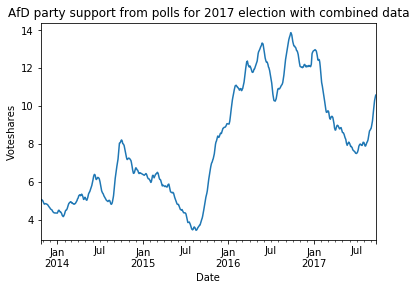

<Figure size 432x288 with 0 Axes>

In [73]:
combined_data_afd['support'].plot()
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("AfD party support from polls for 2017 election with combined data")
plt.show()
plt.clf()

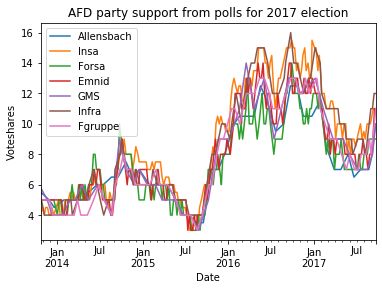

<Figure size 432x288 with 0 Axes>

In [63]:
# Compare with plots of all institutions for AFD

interpolated_election2017_allen_afd.plot(label="Allensbach", legend = True)
interpolated_election2017_insa_afd.plot(label="Insa", legend = True)
interpolated_election2017_forsa_afd.plot(label="Forsa", legend = True)
interpolated_election2017_emnid_afd.plot(label="Emnid", legend = True)
interpolated_election2017_gms_afd.plot(label="GMS", legend = True)
interpolated_election2017_infra_afd.plot(label="Infra", legend = True)
interpolated_election2017_fgruppe_afd.plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("AFD party support from polls for 2017 election")
plt.show()
plt.clf()

#### Combined Average Model for SPD Party in 2017 Polls

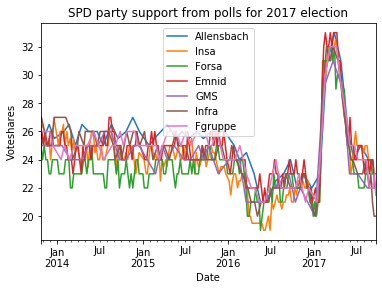

<Figure size 432x288 with 0 Axes>

In [64]:
# array(['oth', 'gru', 'spd', 'cdu', 'lin', 'fdp', 'afd'], dtype=object)


#Create dataframe for SPD voteshares polls by each of the 7 institutions

election2017_allen_spd = election2017_allen.loc[election2017_allen['party'] == 'spd']
election2017_insa_spd = election2017_insa.loc[election2017_insa['party'] == 'spd']
election2017_forsa_spd = election2017_forsa.loc[election2017_forsa['party'] == 'spd']
election2017_emnid_spd = election2017_emnid.loc[election2017_emnid['party'] == 'spd']
election2017_gms_spd = election2017_gms.loc[election2017_gms['party'] == 'spd']
election2017_infra_spd = election2017_infra.loc[election2017_infra['party'] == 'spd']
election2017_fgruppe_spd = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'spd']

#Create upsampled and interpolated data for Allen in SPD voteshares

t_index_final = pd.date_range(start='2013-10-23', end='2017-09-21', freq='D')
t_index_allen = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_allen_spd = election2017_allen_spd['support'].resample('D').first().reindex(t_index_allen)
interpolated_election2017_allen_spd = upsampled_election2017_allen_spd.interpolate(how='linear')
interpolated_election2017_allen_spd = interpolated_election2017_allen_spd.reindex(t_index_final)

#Create upsampled and interpolated data for Insa in SPD voteshares

t_index_insa = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_insa_spd = election2017_insa_spd['support'].resample('D').first().reindex(t_index_insa)
interpolated_election2017_insa_spd = upsampled_election2017_insa_spd.interpolate(how='linear')
interpolated_election2017_insa_spd = interpolated_election2017_insa_spd.reindex(t_index_final)

#Create upsampled and interpolated data for Forsa in SPD voteshares

t_index_forsa = pd.date_range(start='2013-10-01', end='2017-09-21', freq='D')

upsampled_election2017_forsa_spd = election2017_forsa_spd['support'].resample('D').first().reindex(t_index_forsa)
interpolated_election2017_forsa_spd = upsampled_election2017_forsa_spd.interpolate(how='linear')
interpolated_election2017_forsa_spd = interpolated_election2017_forsa_spd.reindex(t_index_final)

#Create upsampled and interpolated data for Emnid in SPD voteshares

t_index_emnid = pd.date_range(start='2013-09-29', end='2017-09-21', freq='D')

upsampled_election2017_emnid_spd = election2017_emnid_spd['support'].resample('D').first().reindex(t_index_emnid)
interpolated_election2017_emnid_spd = upsampled_election2017_emnid_spd.interpolate(how='linear')
interpolated_election2017_emnid_spd = interpolated_election2017_emnid_spd.reindex(t_index_final)

#Create upsampled and interpolated data for GMS in SPD voteshares

t_index_gms = pd.date_range(start='2013-10-15', end='2017-09-21', freq='D')

upsampled_election2017_gms_spd = election2017_gms_spd['support'].resample('D').first().reindex(t_index_gms)
interpolated_election2017_gms_spd = upsampled_election2017_gms_spd.interpolate(how='linear')
interpolated_election2017_gms_spd = interpolated_election2017_gms_spd.reindex(t_index_final)

#Create upsampled and interpolated data for Infra in SPD voteshares

t_index_infra = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_infra_spd = election2017_infra_spd['support'].resample('D').first().reindex(t_index_infra)
interpolated_election2017_infra_spd = upsampled_election2017_infra_spd.interpolate(how='linear')
interpolated_election2017_infra_spd = interpolated_election2017_infra_spd.reindex(t_index_final)

#Create upsampled and interpolated data for Fgruppe in SPD voteshares

t_index_fgruppe = pd.date_range(start='2013-09-27', end='2017-09-21', freq='D')

upsampled_election2017_fgruppe_spd = election2017_fgruppe_spd['support'].resample('D').first().reindex(t_index_fgruppe)
interpolated_election2017_fgruppe_spd = upsampled_election2017_fgruppe_spd.interpolate(how='linear')
interpolated_election2017_fgruppe_spd = interpolated_election2017_fgruppe_spd.reindex(t_index_final)

# Plot out party support shares for SPD through polls of all institutions

interpolated_election2017_allen_spd.plot(label="Allensbach", legend = True)
interpolated_election2017_insa_spd.plot(label="Insa", legend = True)
interpolated_election2017_forsa_spd.plot(label="Forsa", legend = True)
interpolated_election2017_emnid_spd.plot(label="Emnid", legend = True)
interpolated_election2017_gms_spd.plot(label="GMS", legend = True)
interpolated_election2017_infra_spd.plot(label="Infra", legend = True)
interpolated_election2017_fgruppe_spd.plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("SPD party support from polls for 2017 election")
plt.show()
plt.clf()

In [65]:
# Combined data for SPD

df_2017_allen_spd_combined = interpolated_election2017_allen_spd.to_frame()
df_2017_insa_spd_combined = interpolated_election2017_insa_spd.to_frame()
df_2017_forsa_spd_combined = interpolated_election2017_forsa_spd.to_frame()
df_2017_emnid_spd_combined = interpolated_election2017_emnid_spd.to_frame()
df_2017_gms_spd_combined = interpolated_election2017_gms_spd.to_frame()
df_2017_infra_spd_combined = interpolated_election2017_infra_spd.to_frame()
df_2017_fgruppe_spd_combined = interpolated_election2017_fgruppe_spd.to_frame()

# Concatenate all data for SPD together
combined_data_spd = pd.concat([df_2017_allen_spd_combined, df_2017_insa_spd_combined, df_2017_forsa_spd_combined, 
                               df_2017_emnid_spd_combined, df_2017_gms_spd_combined, df_2017_infra_spd_combined, 
                               df_2017_fgruppe_spd_combined]).groupby(level=0).mean()

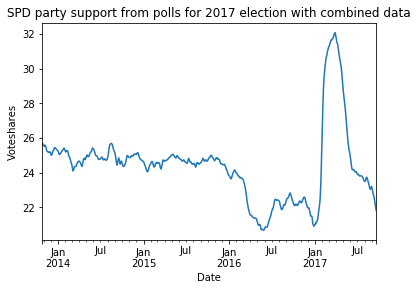

<Figure size 432x288 with 0 Axes>

In [66]:
# Plot combined data

combined_data_spd['support'].plot()
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("SPD party support from polls for 2017 election with combined data")
plt.show()
plt.clf()

#### Combined Average Model for CDU Party in 2017 Polls

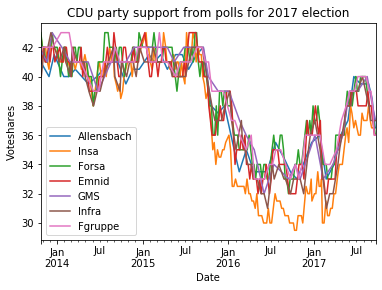

<Figure size 432x288 with 0 Axes>

In [67]:
# array(['oth', 'gru', 'spd', 'cdu', 'lin', 'fdp', 'afd'], dtype=object)


#Create dataframe for CDU voteshares polls by each of the 7 institutions

election2017_allen_cdu = election2017_allen.loc[election2017_allen['party'] == 'cdu']
election2017_insa_cdu = election2017_insa.loc[election2017_insa['party'] == 'cdu']
election2017_forsa_cdu = election2017_forsa.loc[election2017_forsa['party'] == 'cdu']
election2017_emnid_cdu = election2017_emnid.loc[election2017_emnid['party'] == 'cdu']
election2017_gms_cdu = election2017_gms.loc[election2017_gms['party'] == 'cdu']
election2017_infra_cdu = election2017_infra.loc[election2017_infra['party'] == 'cdu']
election2017_fgruppe_cdu = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'cdu']

#Create upsampled and interpolated data for Allen in CDU voteshares

t_index_final = pd.date_range(start='2013-10-23', end='2017-09-21', freq='D')
t_index_allen = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_allen_cdu = election2017_allen_cdu['support'].resample('D').first().reindex(t_index_allen)
interpolated_election2017_allen_cdu = upsampled_election2017_allen_cdu.interpolate(how='linear')
interpolated_election2017_allen_cdu = interpolated_election2017_allen_cdu.reindex(t_index_final)

#Create upsampled and interpolated data for Insa in CDU voteshares

t_index_insa = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_insa_cdu = election2017_insa_cdu['support'].resample('D').first().reindex(t_index_insa)
interpolated_election2017_insa_cdu = upsampled_election2017_insa_cdu.interpolate(how='linear')
interpolated_election2017_insa_cdu = interpolated_election2017_insa_cdu.reindex(t_index_final)

#Create upsampled and interpolated data for Forsa in AFD voteshares

t_index_forsa = pd.date_range(start='2013-10-01', end='2017-09-21', freq='D')

upsampled_election2017_forsa_cdu = election2017_forsa_cdu['support'].resample('D').first().reindex(t_index_forsa)
interpolated_election2017_forsa_cdu = upsampled_election2017_forsa_cdu.interpolate(how='linear')
interpolated_election2017_forsa_cdu = interpolated_election2017_forsa_cdu.reindex(t_index_final)

#Create upsampled and interpolated data for Emnid in AFD voteshares

t_index_emnid = pd.date_range(start='2013-09-29', end='2017-09-21', freq='D')

upsampled_election2017_emnid_cdu = election2017_emnid_cdu['support'].resample('D').first().reindex(t_index_emnid)
interpolated_election2017_emnid_cdu = upsampled_election2017_emnid_cdu.interpolate(how='linear')
interpolated_election2017_emnid_cdu = interpolated_election2017_emnid_cdu.reindex(t_index_final)

#Create upsampled and interpolated data for GMS in AFD voteshares

t_index_gms = pd.date_range(start='2013-10-15', end='2017-09-21', freq='D')

upsampled_election2017_gms_cdu = election2017_gms_cdu['support'].resample('D').first().reindex(t_index_gms)
interpolated_election2017_gms_cdu = upsampled_election2017_gms_cdu.interpolate(how='linear')
interpolated_election2017_gms_cdu = interpolated_election2017_gms_cdu.reindex(t_index_final)

#Create upsampled and interpolated data for Infra in AFD voteshares

t_index_infra = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_infra_cdu = election2017_infra_cdu['support'].resample('D').first().reindex(t_index_infra)
interpolated_election2017_infra_cdu = upsampled_election2017_infra_cdu.interpolate(how='linear')
interpolated_election2017_infra_cdu = interpolated_election2017_infra_cdu.reindex(t_index_final)

#Create upsampled and interpolated data for Fgruppe in AFD voteshares

t_index_fgruppe = pd.date_range(start='2013-09-27', end='2017-09-21', freq='D')

upsampled_election2017_fgruppe_cdu = election2017_fgruppe_cdu['support'].resample('D').first().reindex(t_index_fgruppe)
interpolated_election2017_fgruppe_cdu = upsampled_election2017_fgruppe_cdu.interpolate(how='linear')
interpolated_election2017_fgruppe_cdu = interpolated_election2017_fgruppe_cdu.reindex(t_index_final)

# Plot out party support shares for AFD through polls of all institutions

interpolated_election2017_allen_cdu.plot(label="Allensbach", legend = True)
interpolated_election2017_insa_cdu.plot(label="Insa", legend = True)
interpolated_election2017_forsa_cdu.plot(label="Forsa", legend = True)
interpolated_election2017_emnid_cdu.plot(label="Emnid", legend = True)
interpolated_election2017_gms_cdu.plot(label="GMS", legend = True)
interpolated_election2017_infra_cdu.plot(label="Infra", legend = True)
interpolated_election2017_fgruppe_cdu.plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("CDU party support from polls for 2017 election")
plt.show()
plt.clf()

In [68]:
# Combined data for SPD

df_2017_allen_cdu_combined = interpolated_election2017_allen_cdu.to_frame()
df_2017_insa_cdu_combined = interpolated_election2017_insa_cdu.to_frame()
df_2017_forsa_cdu_combined = interpolated_election2017_forsa_cdu.to_frame()
df_2017_emnid_cdu_combined = interpolated_election2017_emnid_cdu.to_frame()
df_2017_gms_cdu_combined = interpolated_election2017_gms_cdu.to_frame()
df_2017_infra_cdu_combined = interpolated_election2017_infra_cdu.to_frame()
df_2017_fgruppe_cdu_combined = interpolated_election2017_fgruppe_cdu.to_frame()

# Concatenate all data for SPD together
combined_data_cdu = pd.concat([df_2017_allen_cdu_combined, df_2017_insa_cdu_combined, df_2017_forsa_cdu_combined, 
                               df_2017_emnid_cdu_combined, df_2017_gms_cdu_combined, df_2017_infra_cdu_combined, 
                               df_2017_fgruppe_cdu_combined]).groupby(level=0).mean()

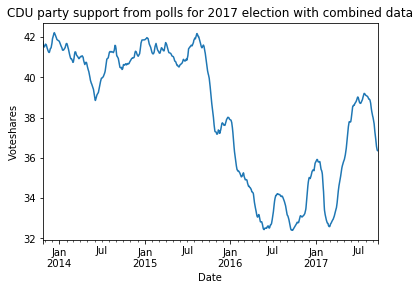

<Figure size 432x288 with 0 Axes>

In [69]:
# Plot combined data

combined_data_cdu['support'].plot()
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("CDU party support from polls for 2017 election with combined data")
plt.show()
plt.clf()

#### Combined Average Model for Green Party in 2017 Polls


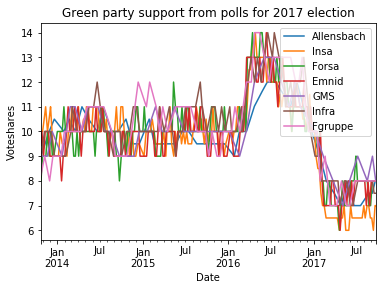

<Figure size 432x288 with 0 Axes>

In [70]:

#Create dataframe for Green voteshares polls by each of the 7 institutions

election2017_allen_gru = election2017_allen.loc[election2017_allen['party'] == 'gru']
election2017_insa_gru = election2017_insa.loc[election2017_insa['party'] == 'gru']
election2017_forsa_gru = election2017_forsa.loc[election2017_forsa['party'] == 'gru']
election2017_emnid_gru = election2017_emnid.loc[election2017_emnid['party'] == 'gru']
election2017_gms_gru = election2017_gms.loc[election2017_gms['party'] == 'gru']
election2017_infra_gru = election2017_infra.loc[election2017_infra['party'] == 'gru']
election2017_fgruppe_gru = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'gru']

#Create upsampled and interpolated data for Allen in Green voteshares

upsampled_election2017_allen_gru = election2017_allen_gru['support'].resample('D').first().reindex(t_index_allen)
interpolated_election2017_allen_gru = upsampled_election2017_allen_gru.interpolate(how='linear')
interpolated_election2017_allen_gru = interpolated_election2017_allen_gru.reindex(t_index_final)

#Create upsampled and interpolated data for Insa in Green voteshares

upsampled_election2017_insa_gru = election2017_insa_gru['support'].resample('D').first().reindex(t_index_insa)
interpolated_election2017_insa_gru = upsampled_election2017_insa_gru.interpolate(how='linear')
interpolated_election2017_insa_gru = interpolated_election2017_insa_gru.reindex(t_index_final)

#Create upsampled and interpolated data for Forsa in Green voteshares

upsampled_election2017_forsa_gru = election2017_forsa_gru['support'].resample('D').first().reindex(t_index_forsa)
interpolated_election2017_forsa_gru = upsampled_election2017_forsa_gru.interpolate(how='linear')
interpolated_election2017_forsa_gru = interpolated_election2017_forsa_gru.reindex(t_index_final)

#Create upsampled and interpolated data for Emnid in Green voteshares

upsampled_election2017_emnid_gru = election2017_emnid_gru['support'].resample('D').first().reindex(t_index_emnid)
interpolated_election2017_emnid_gru = upsampled_election2017_emnid_gru.interpolate(how='linear')
interpolated_election2017_emnid_gru = interpolated_election2017_emnid_gru.reindex(t_index_final)

#Create upsampled and interpolated data for GMS in Green voteshares

upsampled_election2017_gms_gru = election2017_gms_gru['support'].resample('D').first().reindex(t_index_gms)
interpolated_election2017_gms_gru = upsampled_election2017_gms_gru.interpolate(how='linear')
interpolated_election2017_gms_gru = interpolated_election2017_gms_gru.reindex(t_index_final)

#Create upsampled and interpolated data for Infra in Green voteshares

upsampled_election2017_infra_gru = election2017_infra_gru['support'].resample('D').first().reindex(t_index_infra)
interpolated_election2017_infra_gru = upsampled_election2017_infra_gru.interpolate(how='linear')
interpolated_election2017_infra_gru = interpolated_election2017_infra_gru.reindex(t_index_final)

#Create upsampled and interpolated data for Fgruppe in Green voteshares

upsampled_election2017_fgruppe_gru = election2017_fgruppe_gru['support'].resample('D').first().reindex(t_index_fgruppe)
interpolated_election2017_fgruppe_gru = upsampled_election2017_fgruppe_gru.interpolate(how='linear')
interpolated_election2017_fgruppe_gru = interpolated_election2017_fgruppe_gru.reindex(t_index_final)

# Plot out party support shares for Green through polls of all institutions

interpolated_election2017_allen_gru.plot(label="Allensbach", legend = True)
interpolated_election2017_insa_gru.plot(label="Insa", legend = True)
interpolated_election2017_forsa_gru.plot(label="Forsa", legend = True)
interpolated_election2017_emnid_gru.plot(label="Emnid", legend = True)
interpolated_election2017_gms_gru.plot(label="GMS", legend = True)
interpolated_election2017_infra_gru.plot(label="Infra", legend = True)
interpolated_election2017_fgruppe_gru.plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("Green party support from polls for 2017 election")
plt.show()
plt.clf()

In [71]:
# Combined data for Green Party

df_2017_allen_gru_combined = interpolated_election2017_allen_gru.to_frame()
df_2017_insa_gru_combined = interpolated_election2017_insa_gru.to_frame()
df_2017_forsa_gru_combined = interpolated_election2017_forsa_gru.to_frame()
df_2017_emnid_gru_combined = interpolated_election2017_emnid_gru.to_frame()
df_2017_gms_gru_combined = interpolated_election2017_gms_gru.to_frame()
df_2017_infra_gru_combined = interpolated_election2017_infra_gru.to_frame()
df_2017_fgruppe_gru_combined = interpolated_election2017_fgruppe_gru.to_frame()

# Concatenate all data for Green together
combined_data_gru = pd.concat([df_2017_allen_gru_combined, df_2017_insa_gru_combined, df_2017_forsa_gru_combined, 
                               df_2017_emnid_gru_combined, df_2017_gms_gru_combined, df_2017_infra_gru_combined, 
                               df_2017_fgruppe_gru_combined]).groupby(level=0).mean()

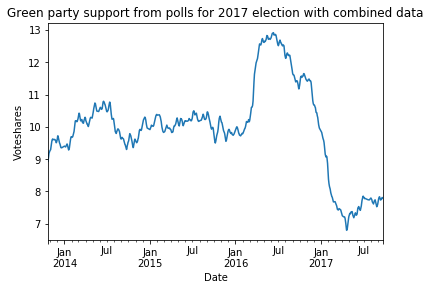

<Figure size 432x288 with 0 Axes>

In [72]:
# Plot combined data

combined_data_gru['support'].plot()
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("Green party support from polls for 2017 election with combined data")
plt.show()
plt.clf()

#### Combined Average Model for FDP Party in 2017 Polls


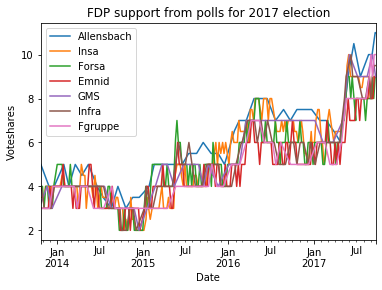

<Figure size 432x288 with 0 Axes>

In [73]:

#Create dataframe for FDP voteshares polls by each of the 7 institutions

election2017_allen_fdp = election2017_allen.loc[election2017_allen['party'] == 'fdp']
election2017_insa_fdp = election2017_insa.loc[election2017_insa['party'] == 'fdp']
election2017_forsa_fdp = election2017_forsa.loc[election2017_forsa['party'] == 'fdp']
election2017_emnid_fdp = election2017_emnid.loc[election2017_emnid['party'] == 'fdp']
election2017_gms_fdp = election2017_gms.loc[election2017_gms['party'] == 'fdp']
election2017_infra_fdp = election2017_infra.loc[election2017_infra['party'] == 'fdp']
election2017_fgruppe_fdp = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'fdp']

#Create upsampled and interpolated data for Allen in FDP voteshares

upsampled_election2017_allen_fdp = election2017_allen_fdp['support'].resample('D').first().reindex(t_index_allen)
interpolated_election2017_allen_fdp = upsampled_election2017_allen_fdp.interpolate(how='linear')
interpolated_election2017_allen_fdp = interpolated_election2017_allen_fdp.reindex(t_index_final)

#Create upsampled and interpolated data for Insa in FDP voteshares

upsampled_election2017_insa_fdp = election2017_insa_fdp['support'].resample('D').first().reindex(t_index_insa)
interpolated_election2017_insa_fdp = upsampled_election2017_insa_fdp.interpolate(how='linear')
interpolated_election2017_insa_fdp = interpolated_election2017_insa_fdp.reindex(t_index_final)

#Create upsampled and interpolated data for Forsa in FDP voteshares

upsampled_election2017_forsa_fdp = election2017_forsa_fdp['support'].resample('D').first().reindex(t_index_forsa)
interpolated_election2017_forsa_fdp = upsampled_election2017_forsa_fdp.interpolate(how='linear')
interpolated_election2017_forsa_fdp = interpolated_election2017_forsa_fdp.reindex(t_index_final)

#Create upsampled and interpolated data for Emnid in FDP voteshares

upsampled_election2017_emnid_fdp = election2017_emnid_fdp['support'].resample('D').first().reindex(t_index_emnid)
interpolated_election2017_emnid_fdp = upsampled_election2017_emnid_fdp.interpolate(how='linear')
interpolated_election2017_emnid_fdp = interpolated_election2017_emnid_fdp.reindex(t_index_final)

#Create upsampled and interpolated data for GMS in FDP voteshares

upsampled_election2017_gms_fdp = election2017_gms_fdp['support'].resample('D').first().reindex(t_index_gms)
interpolated_election2017_gms_fdp = upsampled_election2017_gms_fdp.interpolate(how='linear')
interpolated_election2017_gms_fdp = interpolated_election2017_gms_fdp.reindex(t_index_final)

#Create upsampled and interpolated data for Infra in FDP voteshares

upsampled_election2017_infra_fdp = election2017_infra_fdp['support'].resample('D').first().reindex(t_index_infra)
interpolated_election2017_infra_fdp = upsampled_election2017_infra_fdp.interpolate(how='linear')
interpolated_election2017_infra_fdp = interpolated_election2017_infra_fdp.reindex(t_index_final)

#Create upsampled and interpolated data for Fgruppe in FDP voteshares

upsampled_election2017_fgruppe_fdp = election2017_fgruppe_fdp['support'].resample('D').first().reindex(t_index_fgruppe)
interpolated_election2017_fgruppe_fdp = upsampled_election2017_fgruppe_fdp.interpolate(how='linear')
interpolated_election2017_fgruppe_fdp = interpolated_election2017_fgruppe_fdp.reindex(t_index_final)

# Plot out party support shares for FDP through polls of all institutions

interpolated_election2017_allen_fdp.plot(label="Allensbach", legend = True)
interpolated_election2017_insa_fdp.plot(label="Insa", legend = True)
interpolated_election2017_forsa_fdp.plot(label="Forsa", legend = True)
interpolated_election2017_emnid_fdp.plot(label="Emnid", legend = True)
interpolated_election2017_gms_fdp.plot(label="GMS", legend = True)
interpolated_election2017_infra_fdp.plot(label="Infra", legend = True)
interpolated_election2017_fgruppe_fdp.plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("FDP support from polls for 2017 election")
plt.show()
plt.clf()

In [80]:
# Combined data for FDP Party

df_2017_allen_fdp_combined = interpolated_election2017_allen_fdp.to_frame()
df_2017_insa_fdp_combined = interpolated_election2017_insa_fdp.to_frame()
df_2017_forsa_fdp_combined = interpolated_election2017_forsa_fdp.to_frame()
df_2017_emnid_fdp_combined = interpolated_election2017_emnid_fdp.to_frame()
df_2017_gms_fdp_combined = interpolated_election2017_gms_fdp.to_frame()
df_2017_infra_fdp_combined = interpolated_election2017_infra_fdp.to_frame()
df_2017_fgruppe_fdp_combined = interpolated_election2017_fgruppe_fdp.to_frame()

# Concatenate all data for Green together
combined_data_fdp = pd.concat([df_2017_allen_fdp_combined, df_2017_insa_fdp_combined, df_2017_forsa_fdp_combined, 
                               df_2017_emnid_fdp_combined, df_2017_gms_fdp_combined, df_2017_infra_fdp_combined, 
                               df_2017_fgruppe_fdp_combined]).groupby(level=0).mean()

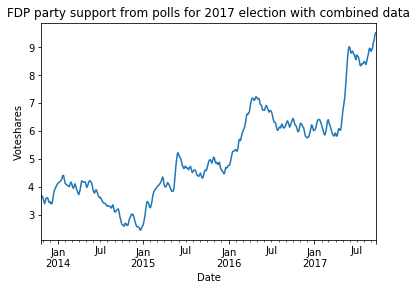

<Figure size 432x288 with 0 Axes>

In [81]:
# Plot combined data

combined_data_fdp['support'].plot()
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("FDP party support from polls for 2017 election with combined data")
plt.show()
plt.clf()

#### Combined Average Model for Die Linke in 2017 Polls


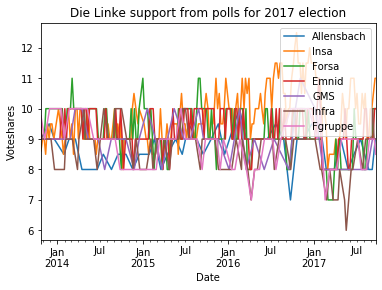

<Figure size 432x288 with 0 Axes>

In [82]:

#Create dataframe for Die Linke voteshares polls by each of the 7 institutions

election2017_allen_lin = election2017_allen.loc[election2017_allen['party'] == 'lin']
election2017_insa_lin = election2017_insa.loc[election2017_insa['party'] == 'lin']
election2017_forsa_lin = election2017_forsa.loc[election2017_forsa['party'] == 'lin']
election2017_emnid_lin = election2017_emnid.loc[election2017_emnid['party'] == 'lin']
election2017_gms_lin = election2017_gms.loc[election2017_gms['party'] == 'lin']
election2017_infra_lin = election2017_infra.loc[election2017_infra['party'] == 'lin']
election2017_fgruppe_lin = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'lin']

#Create upsampled and interpolated data for Allen in Die Linke voteshares

upsampled_election2017_allen_lin = election2017_allen_lin['support'].resample('D').first().reindex(t_index_allen)
interpolated_election2017_allen_lin = upsampled_election2017_allen_lin.interpolate(how='linear')
interpolated_election2017_allen_lin = interpolated_election2017_allen_lin.reindex(t_index_final)

#Create upsampled and interpolated data for Insa in Die Linke voteshares

upsampled_election2017_insa_lin = election2017_insa_lin['support'].resample('D').first().reindex(t_index_insa)
interpolated_election2017_insa_lin = upsampled_election2017_insa_lin.interpolate(how='linear')
interpolated_election2017_insa_lin = interpolated_election2017_insa_lin.reindex(t_index_final)

#Create upsampled and interpolated data for Forsa in Die Linke voteshares

upsampled_election2017_forsa_lin = election2017_forsa_lin['support'].resample('D').first().reindex(t_index_forsa)
interpolated_election2017_forsa_lin = upsampled_election2017_forsa_lin.interpolate(how='linear')
interpolated_election2017_forsa_lin = interpolated_election2017_forsa_lin.reindex(t_index_final)

#Create upsampled and interpolated data for Emnid in Die Linke voteshares

upsampled_election2017_emnid_lin = election2017_emnid_lin['support'].resample('D').first().reindex(t_index_emnid)
interpolated_election2017_emnid_lin = upsampled_election2017_emnid_lin.interpolate(how='linear')
interpolated_election2017_emnid_lin = interpolated_election2017_emnid_lin.reindex(t_index_final)

#Create upsampled and interpolated data for GMS in Die Linke voteshares

upsampled_election2017_gms_lin = election2017_gms_lin['support'].resample('D').first().reindex(t_index_gms)
interpolated_election2017_gms_lin = upsampled_election2017_gms_lin.interpolate(how='linear')
interpolated_election2017_gms_lin = interpolated_election2017_gms_lin.reindex(t_index_final)

#Create upsampled and interpolated data for Infra in Die Linke voteshares

upsampled_election2017_infra_lin = election2017_infra_lin['support'].resample('D').first().reindex(t_index_infra)
interpolated_election2017_infra_lin = upsampled_election2017_infra_lin.interpolate(how='linear')
interpolated_election2017_infra_lin = interpolated_election2017_infra_lin.reindex(t_index_final)

#Create upsampled and interpolated data for Fgruppe in Die Linke voteshares

upsampled_election2017_fgruppe_lin = election2017_fgruppe_lin['support'].resample('D').first().reindex(t_index_fgruppe)
interpolated_election2017_fgruppe_lin = upsampled_election2017_fgruppe_lin.interpolate(how='linear')
interpolated_election2017_fgruppe_lin = interpolated_election2017_fgruppe_lin.reindex(t_index_final)

# Plot out party support shares for Die Linke through polls of all institutions

interpolated_election2017_allen_lin.plot(label="Allensbach", legend = True)
interpolated_election2017_insa_lin.plot(label="Insa", legend = True)
interpolated_election2017_forsa_lin.plot(label="Forsa", legend = True)
interpolated_election2017_emnid_lin.plot(label="Emnid", legend = True)
interpolated_election2017_gms_lin.plot(label="GMS", legend = True)
interpolated_election2017_infra_lin.plot(label="Infra", legend = True)
interpolated_election2017_fgruppe_lin.plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("Die Linke support from polls for 2017 election")
plt.show()
plt.clf()

In [83]:
# Combined data for Die Linke Party

df_2017_allen_lin_combined = interpolated_election2017_allen_lin.to_frame()
df_2017_insa_lin_combined = interpolated_election2017_insa_lin.to_frame()
df_2017_forsa_lin_combined = interpolated_election2017_forsa_lin.to_frame()
df_2017_emnid_lin_combined = interpolated_election2017_emnid_lin.to_frame()
df_2017_gms_lin_combined = interpolated_election2017_gms_lin.to_frame()
df_2017_infra_lin_combined = interpolated_election2017_infra_lin.to_frame()
df_2017_fgruppe_lin_combined = interpolated_election2017_fgruppe_lin.to_frame()

# Concatenate all data for Die Linke together
combined_data_lin = pd.concat([df_2017_allen_lin_combined, df_2017_insa_lin_combined, df_2017_forsa_lin_combined, 
                               df_2017_emnid_lin_combined, df_2017_gms_lin_combined, df_2017_infra_lin_combined, 
                               df_2017_fgruppe_lin_combined]).groupby(level=0).mean()

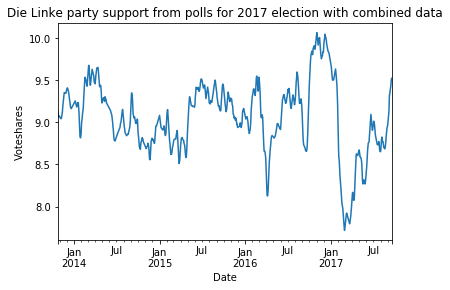

<Figure size 432x288 with 0 Axes>

In [84]:
# Plot combined data

combined_data_lin['support'].plot()
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("Die Linke party support from polls for 2017 election with combined data")
plt.show()
plt.clf()

#### Combined Average Model for Other Parties in 2017 Polls


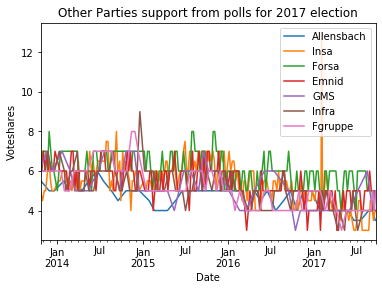

<Figure size 432x288 with 0 Axes>

In [85]:

#Create dataframe for Other Parties voteshares polls by each of the 7 institutions

election2017_allen_oth = election2017_allen.loc[election2017_allen['party'] == 'oth']
election2017_insa_oth = election2017_insa.loc[election2017_insa['party'] == 'oth']
election2017_forsa_oth = election2017_forsa.loc[election2017_forsa['party'] == 'oth']
election2017_emnid_oth = election2017_emnid.loc[election2017_emnid['party'] == 'oth']
election2017_gms_oth = election2017_gms.loc[election2017_gms['party'] == 'oth']
election2017_infra_oth = election2017_infra.loc[election2017_infra['party'] == 'oth']
election2017_fgruppe_oth = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'oth']

#Create upsampled and interpolated data for Allen in Other Parties voteshares

upsampled_election2017_allen_oth = election2017_allen_oth['support'].resample('D').first().reindex(t_index_allen)
interpolated_election2017_allen_oth = upsampled_election2017_allen_oth.interpolate(how='linear')
interpolated_election2017_allen_oth = interpolated_election2017_allen_oth.reindex(t_index_final)

#Create upsampled and interpolated data for Insa in Other Parties voteshares

upsampled_election2017_insa_oth = election2017_insa_oth['support'].resample('D').first().reindex(t_index_insa)
interpolated_election2017_insa_oth = upsampled_election2017_insa_oth.interpolate(how='linear')
interpolated_election2017_insa_oth = interpolated_election2017_insa_oth.reindex(t_index_final)

#Create upsampled and interpolated data for Forsa in Other Parties voteshares

upsampled_election2017_forsa_oth = election2017_forsa_oth['support'].resample('D').first().reindex(t_index_forsa)
interpolated_election2017_forsa_oth = upsampled_election2017_forsa_oth.interpolate(how='linear')
interpolated_election2017_forsa_oth = interpolated_election2017_forsa_oth.reindex(t_index_final)

#Create upsampled and interpolated data for Emnid in Other Parties voteshares

upsampled_election2017_emnid_oth = election2017_emnid_oth['support'].resample('D').first().reindex(t_index_emnid)
interpolated_election2017_emnid_oth = upsampled_election2017_emnid_oth.interpolate(how='linear')
interpolated_election2017_emnid_oth = interpolated_election2017_emnid_oth.reindex(t_index_final)

#Create upsampled and interpolated data for GMS in Other Parties voteshares

upsampled_election2017_gms_oth = election2017_gms_oth['support'].resample('D').first().reindex(t_index_gms)
interpolated_election2017_gms_oth = upsampled_election2017_gms_oth.interpolate(how='linear')
interpolated_election2017_gms_oth = interpolated_election2017_gms_oth.reindex(t_index_final)

#Create upsampled and interpolated data for Infra in Other Parties voteshares

upsampled_election2017_infra_oth = election2017_infra_oth['support'].resample('D').first().reindex(t_index_infra)
interpolated_election2017_infra_oth = upsampled_election2017_infra_oth.interpolate(how='linear')
interpolated_election2017_infra_oth = interpolated_election2017_infra_oth.reindex(t_index_final)

#Create upsampled and interpolated data for Fgruppe in Other Parties voteshares

upsampled_election2017_fgruppe_oth = election2017_fgruppe_oth['support'].resample('D').first().reindex(t_index_fgruppe)
interpolated_election2017_fgruppe_oth = upsampled_election2017_fgruppe_oth.interpolate(how='linear')
interpolated_election2017_fgruppe_oth = interpolated_election2017_fgruppe_oth.reindex(t_index_final)

# Plot out party support shares for Other Parties through polls of all institutions

interpolated_election2017_allen_oth.plot(label="Allensbach", legend = True)
interpolated_election2017_insa_oth.plot(label="Insa", legend = True)
interpolated_election2017_forsa_oth.plot(label="Forsa", legend = True)
interpolated_election2017_emnid_oth.plot(label="Emnid", legend = True)
interpolated_election2017_gms_oth.plot(label="GMS", legend = True)
interpolated_election2017_infra_oth.plot(label="Infra", legend = True)
interpolated_election2017_fgruppe_oth.plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("Other Parties support from polls for 2017 election")
plt.show()
plt.clf()

In [86]:
# Combined data for Other Parties

df_2017_allen_oth_combined = interpolated_election2017_allen_oth.to_frame()
df_2017_insa_oth_combined = interpolated_election2017_insa_oth.to_frame()
df_2017_forsa_oth_combined = interpolated_election2017_forsa_oth.to_frame()
df_2017_emnid_oth_combined = interpolated_election2017_emnid_oth.to_frame()
df_2017_gms_oth_combined = interpolated_election2017_gms_oth.to_frame()
df_2017_infra_oth_combined = interpolated_election2017_infra_oth.to_frame()
df_2017_fgruppe_oth_combined = interpolated_election2017_fgruppe_oth.to_frame()

# Concatenate all data for Other Parties together
combined_data_oth = pd.concat([df_2017_allen_oth_combined, df_2017_insa_oth_combined, df_2017_forsa_oth_combined, 
                               df_2017_emnid_oth_combined, df_2017_gms_oth_combined, df_2017_infra_oth_combined, 
                               df_2017_fgruppe_oth_combined]).groupby(level=0).mean()

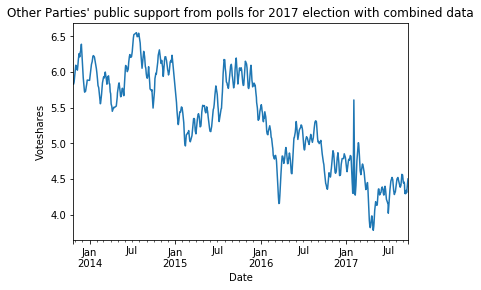

<Figure size 432x288 with 0 Axes>

In [87]:
# Plot combined data

combined_data_oth['support'].plot()
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("Other Parties' public support from polls for 2017 election with combined data")
plt.show()
plt.clf()

In [90]:
combined_data_oth.head()

,support
2013-10-23,5.831066
2013-10-24,5.831293
2013-10-25,5.831519
2013-10-26,5.846032
2013-10-27,5.860544


# Recurrent Neural Network with LSTM

In [98]:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [89]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [121]:
## * Note: I scale all features in range of [0,1].

## If you would like to train based on the resampled data (over days), then used below
afd_values = combined_data_afd.values 


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(afd_values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
print(reframed.head())

   var1(t-1)   var1(t)
1   0.154399  0.155029
2   0.155029  0.155659
3   0.155659  0.154780
4   0.154780  0.153901
5   0.153901  0.153022


In [126]:
# split into train and test sets
values = reframed.values

n_train_time = 365*2
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(730, 1, 1) (730,) (699, 1, 1) (699,)


#### Model architecture¶

1) LSTM with 100 neurons in the first visible layer

3) dropout 20%

4) 1 neuron in the output layer for predicting Global_active_power.

5) The input shape will be 1 time step with 1 features.

6) I use the Mean Absolute Error (MAE) loss function and the efficient Adam version of stochastic gradient descent.

7) The model will be fit for 20 training epochs with a batch size of 70.

Train on 730 samples, validate on 699 samples
Epoch 1/50
730/730 - 2s - loss: 0.0393 - val_loss: 0.3993
Epoch 2/50
730/730 - 0s - loss: 0.0241 - val_loss: 0.3202
Epoch 3/50
730/730 - 0s - loss: 0.0146 - val_loss: 0.2551
Epoch 4/50
730/730 - 0s - loss: 0.0095 - val_loss: 0.2067
Epoch 5/50
730/730 - 0s - loss: 0.0077 - val_loss: 0.1764
Epoch 6/50
730/730 - 0s - loss: 0.0073 - val_loss: 0.1611
Epoch 7/50
730/730 - 0s - loss: 0.0072 - val_loss: 0.1546
Epoch 8/50
730/730 - 0s - loss: 0.0070 - val_loss: 0.1509
Epoch 9/50
730/730 - 0s - loss: 0.0066 - val_loss: 0.1468
Epoch 10/50
730/730 - 0s - loss: 0.0064 - val_loss: 0.1411
Epoch 11/50
730/730 - 0s - loss: 0.0062 - val_loss: 0.1344
Epoch 12/50
730/730 - 0s - loss: 0.0059 - val_loss: 0.1277
Epoch 13/50
730/730 - 0s - loss: 0.0058 - val_loss: 0.1212
Epoch 14/50
730/730 - 0s - loss: 0.0054 - val_loss: 0.1143
Epoch 15/50
730/730 - 0s - loss: 0.0051 - val_loss: 0.1077
Epoch 16/50
730/730 - 0s - loss: 0.0049 - val_loss: 0.1012
Epoch 17/50
730/730

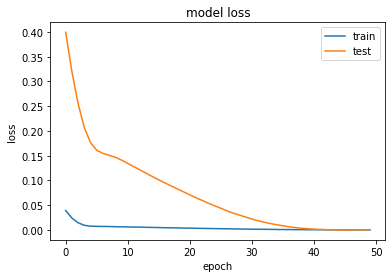

Test RMSE: 0.260


In [127]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(tf.keras.layers.Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')



# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 1))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

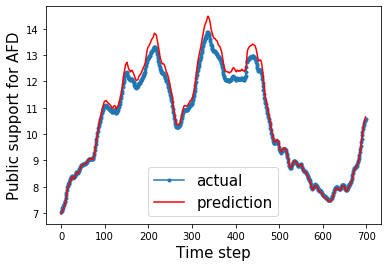

In [128]:
aa=[x for x in range(699)]
plt.plot(aa, inv_y[:699], marker='.', label="actual")
plt.plot(aa, inv_yhat[:699], 'r', label="prediction")
plt.ylabel('Public support for AFD', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

In [116]:
forecast = []
results = []
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

,var1(t-1),var1(t)
count,1429.000000,1429.000000
mean,0.429383,0.429754
std,0.284105,0.284092
min,0.000000,0.000000
25%,0.171978,0.172005
50%,0.389669,0.389978
75%,0.707009,0.707009
max,1.000000,1.000000


In [129]:
## * Note: I scale all features in range of [0,1].

## If you would like to train based on the resampled data (over days), then used below
cdu_values = combined_data_cdu.values 


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(cdu_values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
print(reframed.head())

   var1(t-1)   var1(t)
1   0.954286  0.945745
2   0.945745  0.937204
3   0.937204  0.932839
4   0.932839  0.928475
5   0.928475  0.928265


In [142]:
# split into train and test sets
values = reframed.values

n_train_time = 365*2
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(730, 1, 1) (730,) (699, 1, 1) (699,)


Train on 730 samples, validate on 699 samples
Epoch 1/300
730/730 - 2s - loss: 0.7124 - val_loss: 0.0968
Epoch 2/300
730/730 - 0s - loss: 0.5664 - val_loss: 0.0676
Epoch 3/300
730/730 - 0s - loss: 0.4339 - val_loss: 0.0451
Epoch 4/300
730/730 - 0s - loss: 0.3109 - val_loss: 0.0306
Epoch 5/300
730/730 - 0s - loss: 0.2023 - val_loss: 0.0261
Epoch 6/300
730/730 - 0s - loss: 0.1160 - val_loss: 0.0329
Epoch 7/300
730/730 - 0s - loss: 0.0546 - val_loss: 0.0493
Epoch 8/300
730/730 - 0s - loss: 0.0201 - val_loss: 0.0697
Epoch 9/300
730/730 - 0s - loss: 0.0068 - val_loss: 0.0865
Epoch 10/300
730/730 - 0s - loss: 0.0038 - val_loss: 0.0952
Epoch 11/300
730/730 - 0s - loss: 0.0038 - val_loss: 0.0965
Epoch 12/300
730/730 - 0s - loss: 0.0041 - val_loss: 0.0944
Epoch 13/300
730/730 - 0s - loss: 0.0039 - val_loss: 0.0923
Epoch 14/300
730/730 - 0s - loss: 0.0039 - val_loss: 0.0909
Epoch 15/300
730/730 - 0s - loss: 0.0041 - val_loss: 0.0908
Epoch 16/300
730/730 - 0s - loss: 0.0042 - val_loss: 0.0908
Epo

Epoch 137/300
730/730 - 0s - loss: 0.0024 - val_loss: 0.0425
Epoch 138/300
730/730 - 0s - loss: 0.0026 - val_loss: 0.0415
Epoch 139/300
730/730 - 0s - loss: 0.0027 - val_loss: 0.0415
Epoch 140/300
730/730 - 0s - loss: 0.0024 - val_loss: 0.0411
Epoch 141/300
730/730 - 0s - loss: 0.0024 - val_loss: 0.0402
Epoch 142/300
730/730 - 0s - loss: 0.0026 - val_loss: 0.0399
Epoch 143/300
730/730 - 0s - loss: 0.0026 - val_loss: 0.0395
Epoch 144/300
730/730 - 0s - loss: 0.0027 - val_loss: 0.0394
Epoch 145/300
730/730 - 0s - loss: 0.0026 - val_loss: 0.0390
Epoch 146/300
730/730 - 0s - loss: 0.0028 - val_loss: 0.0383
Epoch 147/300
730/730 - 0s - loss: 0.0025 - val_loss: 0.0379
Epoch 148/300
730/730 - 0s - loss: 0.0026 - val_loss: 0.0383
Epoch 149/300
730/730 - 0s - loss: 0.0025 - val_loss: 0.0376
Epoch 150/300
730/730 - 0s - loss: 0.0025 - val_loss: 0.0365
Epoch 151/300
730/730 - 0s - loss: 0.0028 - val_loss: 0.0362
Epoch 152/300
730/730 - 0s - loss: 0.0027 - val_loss: 0.0360
Epoch 153/300
730/730 - 

Epoch 272/300
730/730 - 0s - loss: 0.0019 - val_loss: 0.0082
Epoch 273/300
730/730 - 0s - loss: 0.0018 - val_loss: 0.0078
Epoch 274/300
730/730 - 0s - loss: 0.0017 - val_loss: 0.0078
Epoch 275/300
730/730 - 0s - loss: 0.0016 - val_loss: 0.0075
Epoch 276/300
730/730 - 0s - loss: 0.0016 - val_loss: 0.0079
Epoch 277/300
730/730 - 0s - loss: 0.0016 - val_loss: 0.0075
Epoch 278/300
730/730 - 0s - loss: 0.0017 - val_loss: 0.0074
Epoch 279/300
730/730 - 0s - loss: 0.0016 - val_loss: 0.0076
Epoch 280/300
730/730 - 0s - loss: 0.0018 - val_loss: 0.0076
Epoch 281/300
730/730 - 0s - loss: 0.0016 - val_loss: 0.0074
Epoch 282/300
730/730 - 0s - loss: 0.0017 - val_loss: 0.0074
Epoch 283/300
730/730 - 0s - loss: 0.0016 - val_loss: 0.0074
Epoch 284/300
730/730 - 0s - loss: 0.0018 - val_loss: 0.0071
Epoch 285/300
730/730 - 0s - loss: 0.0016 - val_loss: 0.0073
Epoch 286/300
730/730 - 0s - loss: 0.0015 - val_loss: 0.0070
Epoch 287/300
730/730 - 0s - loss: 0.0017 - val_loss: 0.0071
Epoch 288/300
730/730 - 

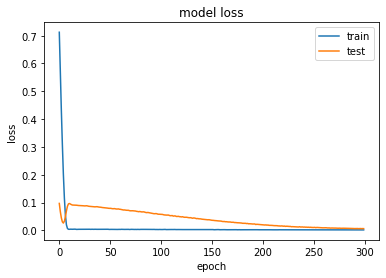

Test RMSE: 0.769


In [143]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(tf.keras.layers.Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')



# fit network
history = model.fit(train_X, train_y, epochs=300, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 1))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

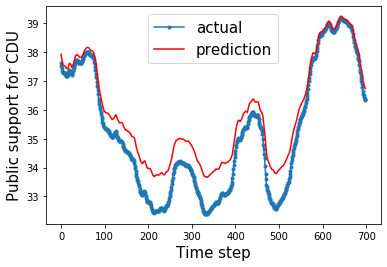

In [149]:
aa=[x for x in range(699)]
plt.plot(aa, inv_y[:699], marker='.', label="actual")
plt.plot(aa, inv_yhat[:699], 'r', label="prediction")
plt.ylabel('Public support for CDU', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

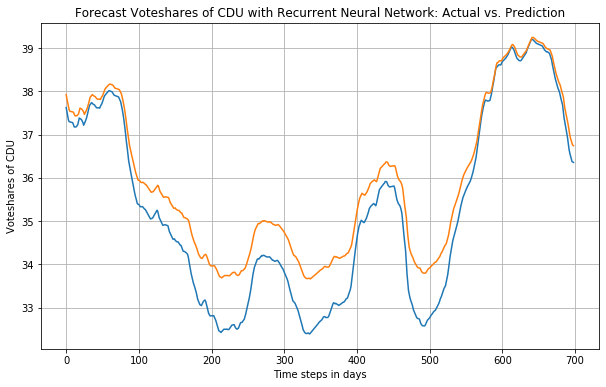

In [158]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time steps in days")
    plt.ylabel("Voteshares of CDU")
    plt.title("Forecast Voteshares of CDU with Recurrent Neural Network: Actual vs. Prediction")
    plt.grid(True)


plt.figure(figsize=(10, 6))
plot_series(aa, inv_y[:699])
plot_series(aa, inv_yhat[:699])

In [159]:
## * Note: I scale all features in range of [0,1].

## If you would like to train based on the resampled data (over days), then used below
spd_values = combined_data_spd.values 


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(spd_values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
print(reframed.head())

   var1(t-1)   var1(t)
1   0.435005  0.437073
2   0.437073  0.439142
3   0.439142  0.439411
4   0.439411  0.439680
5   0.439680  0.436370


In [160]:
# split into train and test sets
values = reframed.values

n_train_time = 365*2
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(730, 1, 1) (730,) (699, 1, 1) (699,)


Train on 730 samples, validate on 699 samples
Epoch 1/300
730/730 - 2s - loss: 0.1069 - val_loss: 0.1030
Epoch 2/300
730/730 - 0s - loss: 0.0677 - val_loss: 0.0729
Epoch 3/300
730/730 - 0s - loss: 0.0369 - val_loss: 0.0513
Epoch 4/300
730/730 - 0s - loss: 0.0157 - val_loss: 0.0389
Epoch 5/300
730/730 - 0s - loss: 0.0044 - val_loss: 0.0349
Epoch 6/300
730/730 - 0s - loss: 0.0012 - val_loss: 0.0351
Epoch 7/300
730/730 - 0s - loss: 0.0010 - val_loss: 0.0353
Epoch 8/300
730/730 - 0s - loss: 9.1442e-04 - val_loss: 0.0350
Epoch 9/300
730/730 - 0s - loss: 7.5436e-04 - val_loss: 0.0348
Epoch 10/300
730/730 - 0s - loss: 7.8207e-04 - val_loss: 0.0346
Epoch 11/300
730/730 - 0s - loss: 7.9646e-04 - val_loss: 0.0346
Epoch 12/300
730/730 - 0s - loss: 7.7804e-04 - val_loss: 0.0345
Epoch 13/300
730/730 - 0s - loss: 7.9461e-04 - val_loss: 0.0345
Epoch 14/300
730/730 - 0s - loss: 8.3750e-04 - val_loss: 0.0344
Epoch 15/300
730/730 - 0s - loss: 7.8479e-04 - val_loss: 0.0344
Epoch 16/300
730/730 - 0s - los

Epoch 129/300
730/730 - 0s - loss: 4.7280e-04 - val_loss: 0.0168
Epoch 130/300
730/730 - 0s - loss: 4.4575e-04 - val_loss: 0.0166
Epoch 131/300
730/730 - 0s - loss: 4.7184e-04 - val_loss: 0.0164
Epoch 132/300
730/730 - 0s - loss: 4.7657e-04 - val_loss: 0.0162
Epoch 133/300
730/730 - 0s - loss: 4.8211e-04 - val_loss: 0.0161
Epoch 134/300
730/730 - 0s - loss: 4.9206e-04 - val_loss: 0.0159
Epoch 135/300
730/730 - 0s - loss: 4.6757e-04 - val_loss: 0.0157
Epoch 136/300
730/730 - 0s - loss: 5.3769e-04 - val_loss: 0.0155
Epoch 137/300
730/730 - 0s - loss: 5.1451e-04 - val_loss: 0.0153
Epoch 138/300
730/730 - 0s - loss: 4.9401e-04 - val_loss: 0.0151
Epoch 139/300
730/730 - 0s - loss: 4.9262e-04 - val_loss: 0.0149
Epoch 140/300
730/730 - 0s - loss: 4.8591e-04 - val_loss: 0.0148
Epoch 141/300
730/730 - 0s - loss: 4.8665e-04 - val_loss: 0.0146
Epoch 142/300
730/730 - 0s - loss: 4.5728e-04 - val_loss: 0.0144
Epoch 143/300
730/730 - 0s - loss: 4.7216e-04 - val_loss: 0.0142
Epoch 144/300
730/730 - 0

730/730 - 0s - loss: 2.2861e-04 - val_loss: 0.0013
Epoch 256/300
730/730 - 0s - loss: 2.3817e-04 - val_loss: 0.0014
Epoch 257/300
730/730 - 0s - loss: 2.2398e-04 - val_loss: 0.0013
Epoch 258/300
730/730 - 0s - loss: 2.2099e-04 - val_loss: 0.0013
Epoch 259/300
730/730 - 0s - loss: 2.2536e-04 - val_loss: 0.0013
Epoch 260/300
730/730 - 0s - loss: 2.3418e-04 - val_loss: 0.0012
Epoch 261/300
730/730 - 0s - loss: 2.2839e-04 - val_loss: 0.0012
Epoch 262/300
730/730 - 0s - loss: 2.1970e-04 - val_loss: 0.0012
Epoch 263/300
730/730 - 0s - loss: 2.1072e-04 - val_loss: 0.0011
Epoch 264/300
730/730 - 0s - loss: 2.2480e-04 - val_loss: 0.0011
Epoch 265/300
730/730 - 0s - loss: 2.0912e-04 - val_loss: 0.0010
Epoch 266/300
730/730 - 0s - loss: 1.9008e-04 - val_loss: 0.0010
Epoch 267/300
730/730 - 0s - loss: 2.0811e-04 - val_loss: 0.0010
Epoch 268/300
730/730 - 0s - loss: 2.2615e-04 - val_loss: 0.0010
Epoch 269/300
730/730 - 0s - loss: 1.9639e-04 - val_loss: 9.6674e-04
Epoch 270/300
730/730 - 0s - loss: 

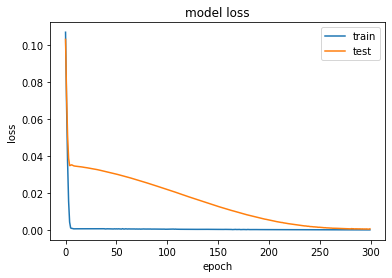

Test RMSE: 0.315


In [161]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(tf.keras.layers.Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')



# fit network
history = model.fit(train_X, train_y, epochs=300, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 1))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

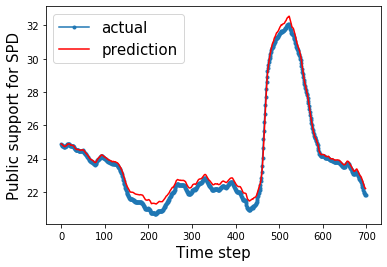

In [162]:
aa=[x for x in range(699)]
plt.plot(aa, inv_y[:699], marker='.', label="actual")
plt.plot(aa, inv_yhat[:699], 'r', label="prediction")
plt.ylabel('Public support for SPD', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

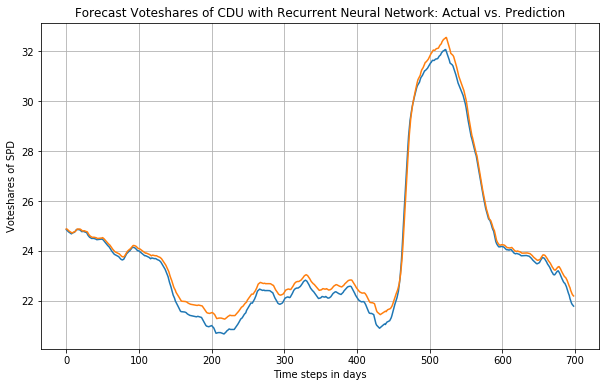

In [163]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time steps in days")
    plt.ylabel("Voteshares of SPD")
    plt.grid(True)


plt.figure(figsize=(10, 6))
plt.title("Forecast Voteshares of CDU with Recurrent Neural Network: Actual vs. Prediction")
plot_series(aa, inv_y[:699])
plot_series(aa, inv_yhat[:699])

#### Die Linke Voteshares Prediction

In [197]:
## * Note: I scale all features in range of [0,1].

## If you would like to train based on the resampled data (over days), then used below
lin_values = combined_data_lin.values 

# normalize features
lin_scaler = MinMaxScaler(feature_range=(0, 1))
lin_scaled = scaler.fit_transform(lin_values)
# frame as supervised learning
reframed = series_to_supervised(lin_scaled, 1, 1)

# drop columns we don't want to predict
print(reframed.head())

   var1(t-1)   var1(t)
1   0.603865  0.596522
2   0.596522  0.589179
3   0.589179  0.581836
4   0.581836  0.574493
5   0.574493  0.575845


In [198]:
# split into train and test sets
values = reframed.values

n_train_time = 365*2
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(730, 1, 1) (730,) (699, 1, 1) (699,)


Train on 730 samples, validate on 699 samples
Epoch 1/100
730/730 - 2s - loss: 0.3142 - val_loss: 0.2684
Epoch 2/100
730/730 - 0s - loss: 0.2394 - val_loss: 0.2014
Epoch 3/100
730/730 - 0s - loss: 0.1724 - val_loss: 0.1428
Epoch 4/100
730/730 - 0s - loss: 0.1149 - val_loss: 0.0933
Epoch 5/100
730/730 - 0s - loss: 0.0683 - val_loss: 0.0555
Epoch 6/100
730/730 - 0s - loss: 0.0340 - val_loss: 0.0316
Epoch 7/100
730/730 - 0s - loss: 0.0148 - val_loss: 0.0207
Epoch 8/100
730/730 - 0s - loss: 0.0068 - val_loss: 0.0179
Epoch 9/100
730/730 - 0s - loss: 0.0059 - val_loss: 0.0179
Epoch 10/100
730/730 - 0s - loss: 0.0060 - val_loss: 0.0179
Epoch 11/100
730/730 - 0s - loss: 0.0056 - val_loss: 0.0176
Epoch 12/100
730/730 - 0s - loss: 0.0057 - val_loss: 0.0173
Epoch 13/100
730/730 - 0s - loss: 0.0056 - val_loss: 0.0171
Epoch 14/100
730/730 - 0s - loss: 0.0054 - val_loss: 0.0169
Epoch 15/100
730/730 - 0s - loss: 0.0052 - val_loss: 0.0167
Epoch 16/100
730/730 - 0s - loss: 0.0055 - val_loss: 0.0166
Epo

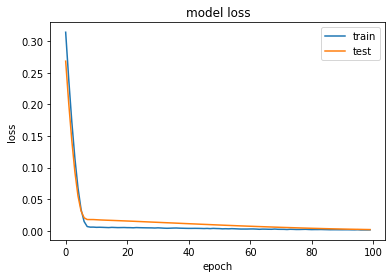

Test RMSE: 0.106


In [199]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 1))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

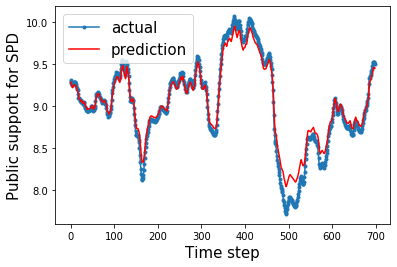

In [200]:
aa=[x for x in range(699)]
plt.plot(aa, inv_y[:699], marker='.', label="actual")
plt.plot(aa, inv_yhat[:699], 'r', label="prediction")
plt.ylabel('Public support for SPD', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

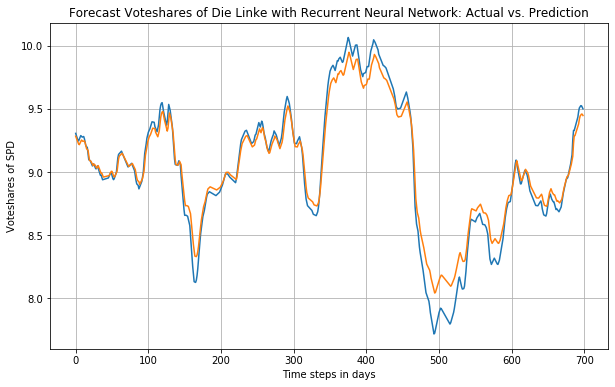

In [202]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time steps in days")
    plt.ylabel("Voteshares of SPD")
    plt.grid(True)


plt.figure(figsize=(10, 6))
plt.title("Forecast Voteshares of Die Linke with Recurrent Neural Network: Actual vs. Prediction")
plot_series(aa, inv_y[:699])
plot_series(aa, inv_yhat[:699])

#### Stacked model for AFD

In [108]:
from mlens.ensemble import SuperLearner

[MLENS] backend: threading


In [74]:
# Create 3-day % changes of support for the current day, and 3 days in the future

combined_data_afd['3d_future'] = combined_data_afd['support'].shift(-3)
combined_data_afd['3d_future_pct'] = combined_data_afd['3d_future'].pct_change(3)
combined_data_afd['3d_pct'] = combined_data_afd['support'].pct_change(3)

In [75]:
combined_data_afd.head(10)

,support,3d_future,3d_future_pct,3d_pct
2013-10-23,5.045125,5.049102,NaN,NaN
2013-10-24,5.051701,5.039927,NaN,NaN
2013-10-25,5.058277,5.030752,NaN,NaN
2013-10-26,5.049102,5.021577,-0.005451,0.000788
2013-10-27,5.039927,5.012402,-0.005461,-0.002331
2013-10-28,5.030752,4.985086,-0.009077,-0.005442
2013-10-29,5.021577,4.957771,-0.012706,-0.005451
2013-10-30,5.012402,4.930455,-0.016349,-0.005461
2013-10-31,4.985086,4.903140,-0.016438,-0.009077
2013-11-01,4.957771,4.875824,-0.016529,-0.012706


In [76]:
feature_names = ['3d_future_pct']  # a list of the feature names for later

# Create moving averages timeperiods of 3, 5, 10, 20, 30, 50, 100 and 200
for n in [3, 5, 10, 20, 30, 50, 100, 200]:

    # Create the moving average indicator and divide by support
    combined_data_afd['ma' + str(n)] = talib.SMA(combined_data_afd['support'].values,
                              timeperiod=n) / combined_data_afd['support']
    # Create the RSI indicator
    #df_2017_allen_afd['rsi' + str(n)] = talib.RSI(df_2017_allen_afd['support'].values, timeperiod=n)
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n)]
print(feature_names)

combined_data_afd = combined_data_afd.dropna()

# Create features and targets
# use feature_names for features; '5d_close_future_pct' for targets
features = combined_data_afd[feature_names]
targets = combined_data_afd['3d_future']

# Create DataFrame from target column and feature columns
feature_and_target_cols = ['3d_future'] + feature_names
feat_targ_df = combined_data_afd[feature_and_target_cols]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

['3d_future_pct', 'ma3', 'ma5', 'ma10', 'ma20', 'ma30', 'ma50', 'ma100', 'ma200']
               3d_future  3d_future_pct       ma3       ma5      ma10  \
3d_future       1.000000      -0.008360 -0.025240 -0.033800 -0.054165   
3d_future_pct  -0.008360       1.000000 -0.876394 -0.842908 -0.767097   
ma3            -0.025240      -0.876394  1.000000  0.987663  0.921327   
ma5            -0.033800      -0.842908  0.987663  1.000000  0.962591   
ma10           -0.054165      -0.767097  0.921327  0.962591  1.000000   
ma20           -0.092885      -0.705962  0.820214  0.864789  0.946686   
ma30           -0.129848      -0.661659  0.760178  0.802037  0.887289   
ma50           -0.193587      -0.565416  0.650390  0.688407  0.772664   
ma100          -0.297369      -0.396802  0.467892  0.498695  0.569671   
ma200          -0.416823      -0.270331  0.326278  0.349714  0.404562   

                   ma20      ma30      ma50     ma100     ma200  
3d_future     -0.092885 -0.129848 -0.193587 -0.2

In [77]:
# Create a size for the training set that is 85% of the total number of samples

# Add a constant to the features
linear_features = sm.add_constant(features)

train_size = int(0.85 * features.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]
print(linear_features.shape, train_features.shape, test_features.shape)

(1228, 10) (1043, 10) (185, 10)


/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [ ]:
#rfr_allen_afd = RandomForestRegressor(n_estimators=50, max_depth=3, max_features=4, random_state=42)

#linear_model_allen_afd = LinearRegression()

#xgb_model_allen_afd = XGBRegressor(colsample_bytree = 0.7, learning_rate= 0.01, max_depth= 7, min_child_weight= 4, n_estimators= 500, nthread= 4, objective= 'reg:linear', silent= 1, subsample= 0.7)

#gbr_allen_afd = GradientBoostingRegressor(max_features=4,
#                                learning_rate=0.01,
#                                n_estimators=200,
#                                subsample=0.6,
#                                random_state=42)


In [136]:
from sklearn.metrics import mean_squared_error

ensemble = SuperLearner(scorer=mean_squared_error, random_state=2019)

# Build the first layer
ensemble.add([RandomForestRegressor(n_estimators=50, max_depth=3, max_features=4, random_state=42), LinearRegression()])

# Build the second layer
ensemble.add([XGBRegressor(),
            GradientBoostingRegressor(n_estimators=200)])

# Attach the final meta estimator
ensemble.add_meta(RandomForestRegressor())

SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7240, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...c0dd08>)],
   n_jobs=-1, name='group-29', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=2019, sample_size=20,
       scorer=<function mean_squared_error at 0x11bc0dd08>, shuffle=False,
       verbose=False)

In [137]:
ensemble.fit(train_features, train_targets)
preds = ensemble.predict(test_features)
print("Fit data:\n%r" % ensemble.data)

/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/mlens/parallel/_base_functions.py:313: ParameterChangeWarning: Parameter value (10) has changed since model was fitted ('warn').
  (lpar, rpar), ParameterChangeWarning)
/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/mlens/parallel/_base_functions.py:313: Param

Fit data:
                                      score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  linearregression               31.74     5.80  0.06  0.01  0.02  0.01
layer-1  randomforestregressor          29.66     0.95  0.15  0.02  0.01  0.00
layer-2  gradientboostingregressor      19.22     5.15  0.23  0.01  0.00  0.00
layer-2  xgbregressor                   21.73     6.97  0.05  0.01  0.00  0.00



/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/mlens/parallel/_base_functions.py:313: ParameterChangeWarning: Parameter value (10) has changed since model was fitted ('warn').
  (lpar, rpar), ParameterChangeWarning)


In [141]:
print("Prediction score: %.3f" % mean_squared_error(preds, test_targets))


Prediction score: 0.876


In [135]:
print(pd.DataFrame(ensemble.data))

                                     score-m   score-s      ft-m      ft-s  \
layer-1/linearregression           31.735142  5.795101  0.009119  0.004386   
layer-1/randomforestregressor      29.656058  0.949032  0.099697  0.026611   
layer-2/gradientboostingregressor  19.243217  5.089629  0.209087  0.003907   
layer-2/xgbregressor               21.728588  6.973239  0.054306  0.006961   

                                       pt-m      pt-s  
layer-1/linearregression           0.018984  0.017864  
layer-1/randomforestregressor      0.008962  0.000417  
layer-2/gradientboostingregressor  0.000796  0.000025  
layer-2/xgbregressor               0.001333  0.000505  


In [138]:
# Gradient Boosting Model 
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model
gbr_allen_afd = GradientBoostingRegressor(max_features=4,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
result_gbr = gbr_allen_afd.fit(train_features, train_targets)

#print(gbr_allen_afd.score(train_features, train_targets))


In [139]:
# Check RMSE
from sklearn.metrics import mean_squared_error

from math import sqrt
gbr_allen_afd_pred = gbr_allen_afd.predict(test_features)
print(sqrt(mean_squared_error(gbr_allen_afd_pred, test_targets)))


2.221062824945684


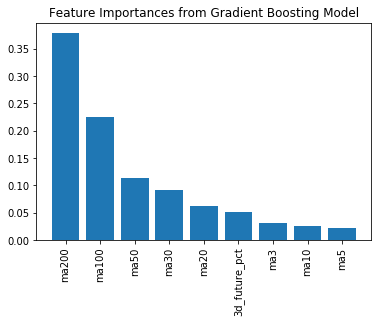

In [140]:
# Extract feature importances from the fitted gradient boosting model
feature_importances_gbr = gbr_allen_afd.feature_importances_
feature_importances_gbr = feature_importances_gbr[feature_importances_gbr != 0]

# Get the indices of the largest to smallest feature importances
sorted_index_gbr = np.argsort(feature_importances_gbr)[::-1]
x_gbr = range(features.shape[1])

# Create tick labels 
labels = np.array(feature_names)[sorted_index_gbr]

plt.bar(x_gbr, feature_importances_gbr[sorted_index_gbr], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.title('Feature Importances from Gradient Boosting Model')
plt.show()

In [103]:
import lime
import lime.lime_tabular

def prob(data):
    return np.array(list(zip(1-model.predict(data),model.predict(data))))

In [104]:
explainer = lime.lime_tabular.LimeTabularExplainer(train_features, feature_names=feat_targ_df.feature_names(), 
                                                   verbose=True, mode='regression')

# asking for explanation for LIME model
i = 25
exp = explainer.explain_instance(test[i], gbr_allen_afd.predict, num_features=5)


AttributeError: 'DataFrame' object has no attribute 'feature_names'